<a href="https://colab.research.google.com/github/6FAN/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Index

* 01:Introduction to Heart Disease DataSet

* 02: Importing some necessary libraries:

* 03: Exploratory Data Analysis

* 04: Density distribution for Age

* 05: Heart Attack Vs Age

* 06: Pair Plot

* 07: Violin Plot

* 08: PieChart

* 09: HeatMap

* 10: Skewness

* 11: Standardization

* 12: Train Test Split

* 13: Evaluation Matrics

* 14: Classification Report

In this, I will take you through how to train a model for the task of heart disease prediction using Machine Learning. I will use the Logistic Regression algorithm in machine learning to train a model to predict heart disease.

# 01:Introduction to Heart Disease DataSet

age: Age of the patient
****
sex: Sex of the patient
****
cp: Chest pain type,
* 0 = Typical Angina,
* 1 = Atypical Angina,
* 2 = Non-anginal Pain,
* 3 = Asymptomatic
****
trtbps: Resting blood pressure (in mm Hg)
****
chol: Cholestoral in mg/dl fetched via BMI sensor
****
fbs: (fasting blood sugar > 120 mg/dl),
* 1 = True,
* 0 = False
****
restecg: Resting electrocardiographic results,
* 0 = Normal,
* 1 = ST-T wave normality,
* 2 = Left ventricular hypertrophy
****
thalachh: Maximum heart rate achieved
****
oldpeak: Previous peak
****
slp: Slope
****
ca: Number of major vessels
****
thal: Thalium Stress Test result ~ (0,3)
****
exng: Exercise induced angina
* 1 = Yes
* 0 = No
****
output: Target variable
* 1 is with heart disease
* 0 is without heart disease

# 02: Importing some necessary libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')



import warnings
warnings.filterwarnings("ignore",
        category= UserWarning)

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [ ]:
df.head().T.style.set_properties(
    **{
    'background-color': 'grey',
    'color': 'white',
    'border-color': 'white'})

# 03: Exploratory Data Analysis

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This dataset looks perfect to use as we don’t have null values.

In [ ]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [ ]:
df[df.duplicated()]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1

**Breakdown for chest pain**

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


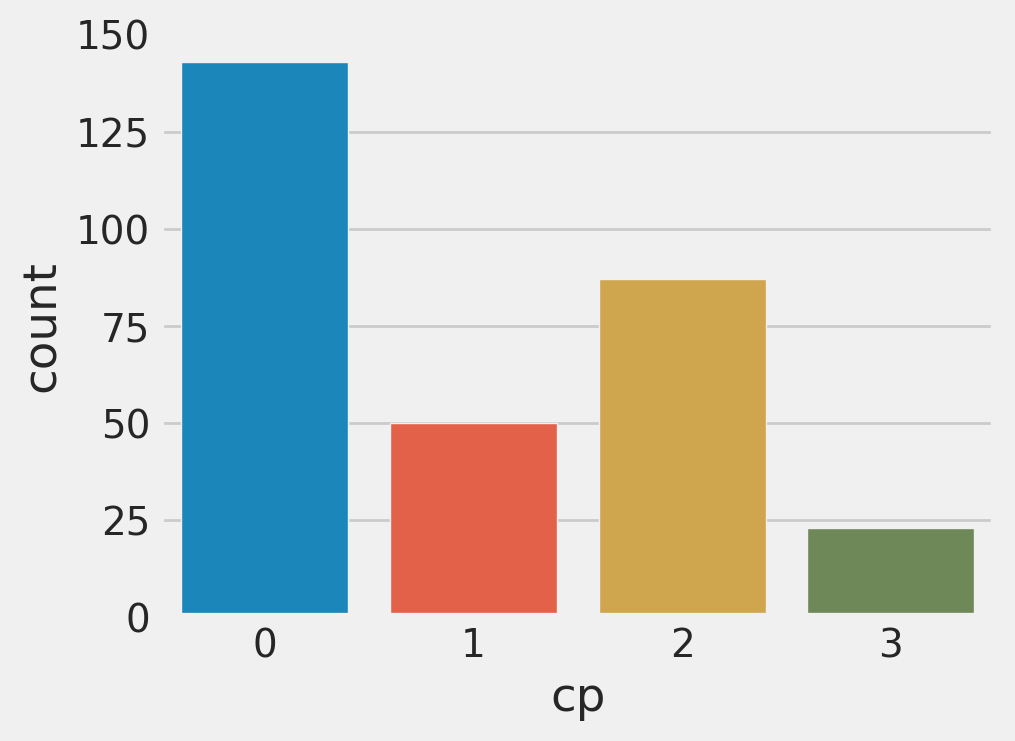

In [ ]:
x=(df.cp.value_counts())
print(x)
p = sns.countplot(data=df, x="cp")
plt.show()

* It can be observed people have chest pain of type 0 i.e 'Typical Angina' is the highest.
* It can be observed people have chest pain of type 3 i.e 'Asymptomatic' is the lowest
* It can also be observed people with chest pain of type 0 is almost 50% of all the people.

0    258
1     45
Name: fbs, dtype: int64


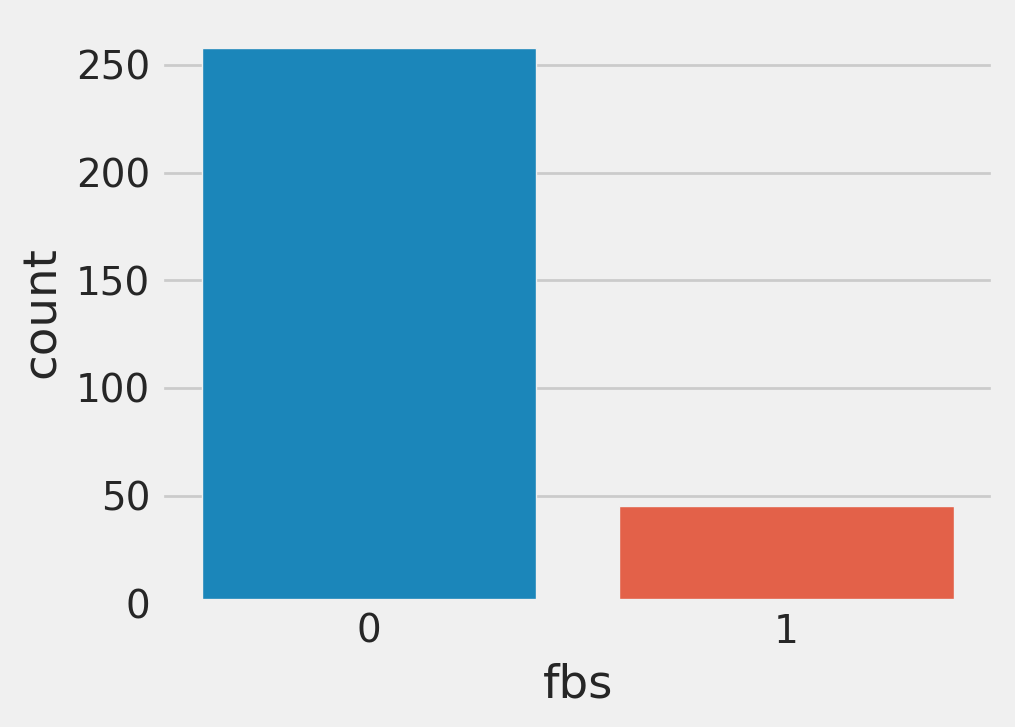

In [ ]:
x=(df.fbs.value_counts())
print(x)
p = sns.countplot(data=df, x="fbs")
plt.show()

**FBS with value 0 is significantly higher than value 1.**

1    152
0    147
2      4
Name: restecg, dtype: int64


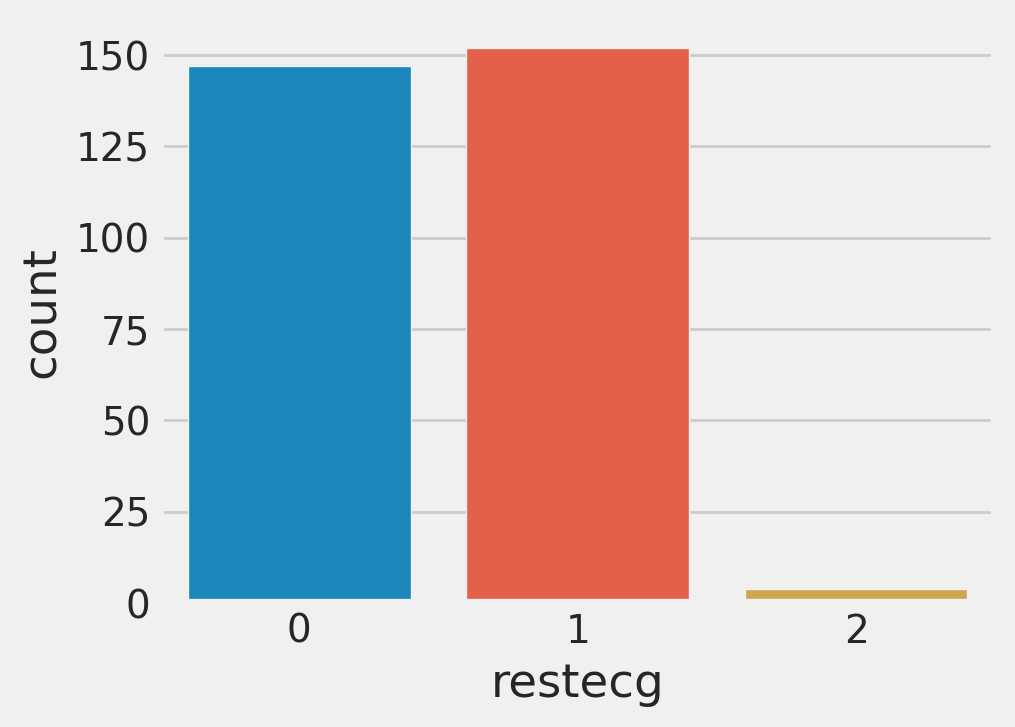

In [ ]:
x=(df.restecg.value_counts())
print(x)
sns.countplot(data=df, x="restecg")
plt.show()

**ECG count is almost the same for type 0 and 1. Also, for type 2 its almost negligible in comparision to type 0 and 1.**

0    204
1     99
Name: exang, dtype: int64


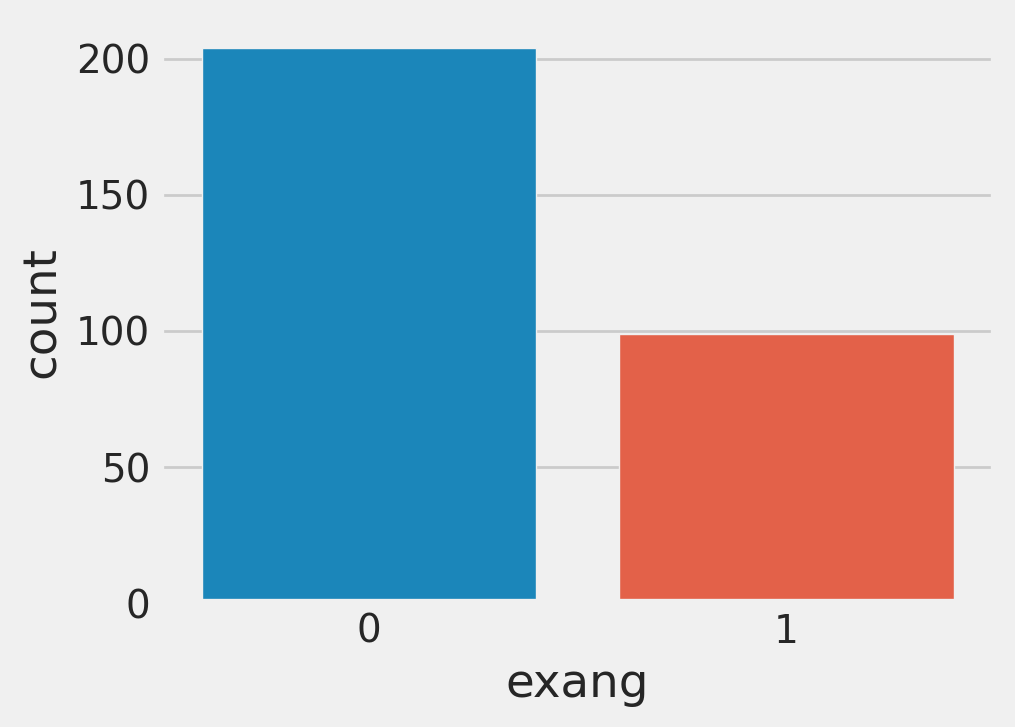

In [ ]:
x = (df.exang.value_counts())
print(x)
sns.countplot(data=df, x='exang')
plt.show()

**EXANG count is more than double for type 0**

**Breakdown for Thalium Stress Test**

2    166
3    117
1     18
0      2
Name: thal, dtype: int64


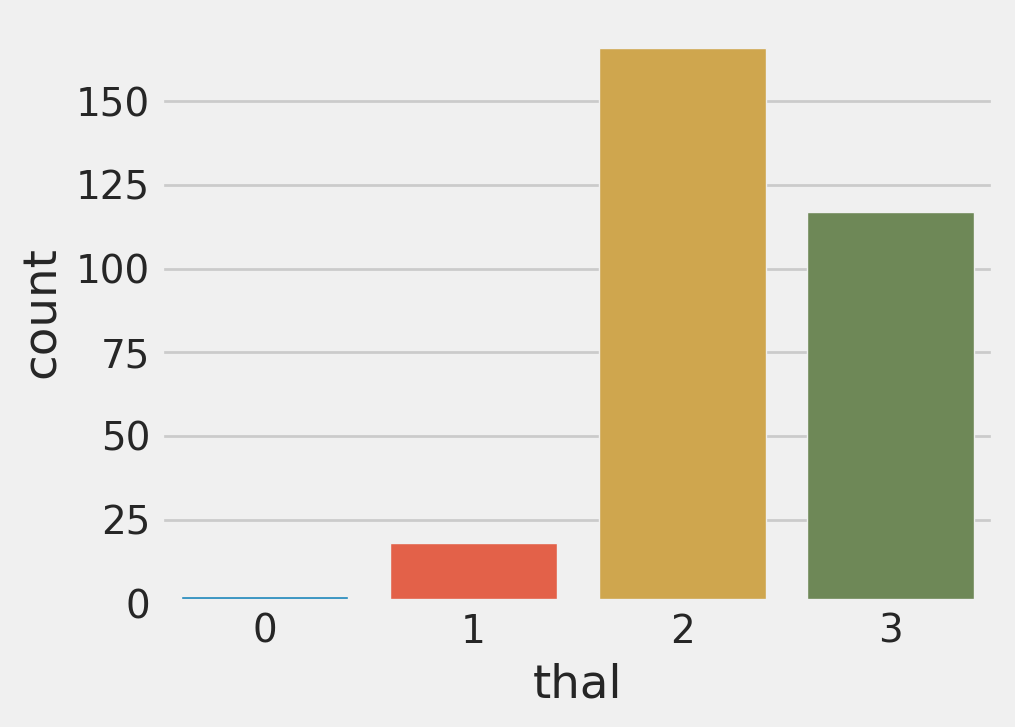

In [ ]:
x = df.thal.value_counts()
print(x)

sns.countplot(data=df, x='thal')
plt.show()

**Thall count is max for type 2 and min for type 0.**

# 04: Density distribution for Age

<Figure size 1000x1000 with 0 Axes>

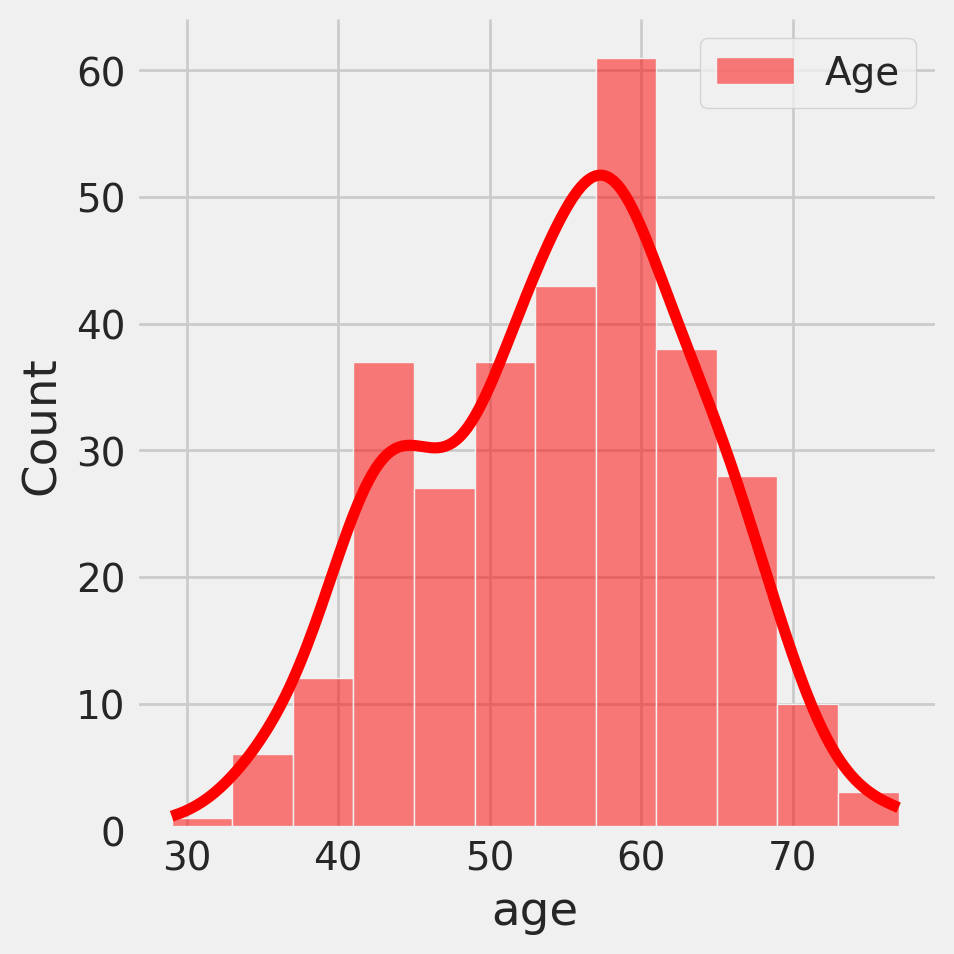

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(df.age,
            color="red",
            label="Age",
            kde= True)

plt.legend()
plt.show()

**Density distribution is highest for age group 55 to 60**

<Figure size 2000x2000 with 0 Axes>

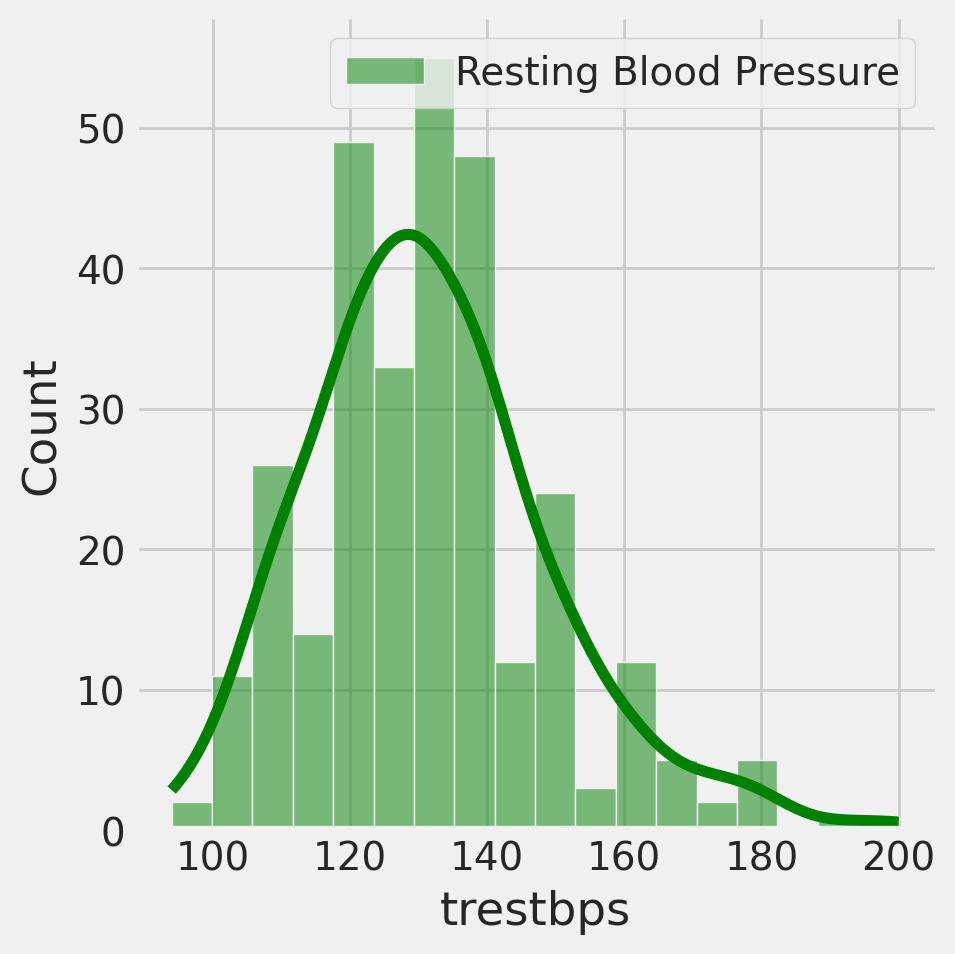

In [ ]:
plt.figure(figsize=(20, 20))
sns.displot(data=df.trestbps,
           color='green',
           label="Resting Blood Pressure",
           kde=True)

plt.legend()
plt.show()

**Trtbs has the highest count around 130**

# 05: Heart Attack Vs Age

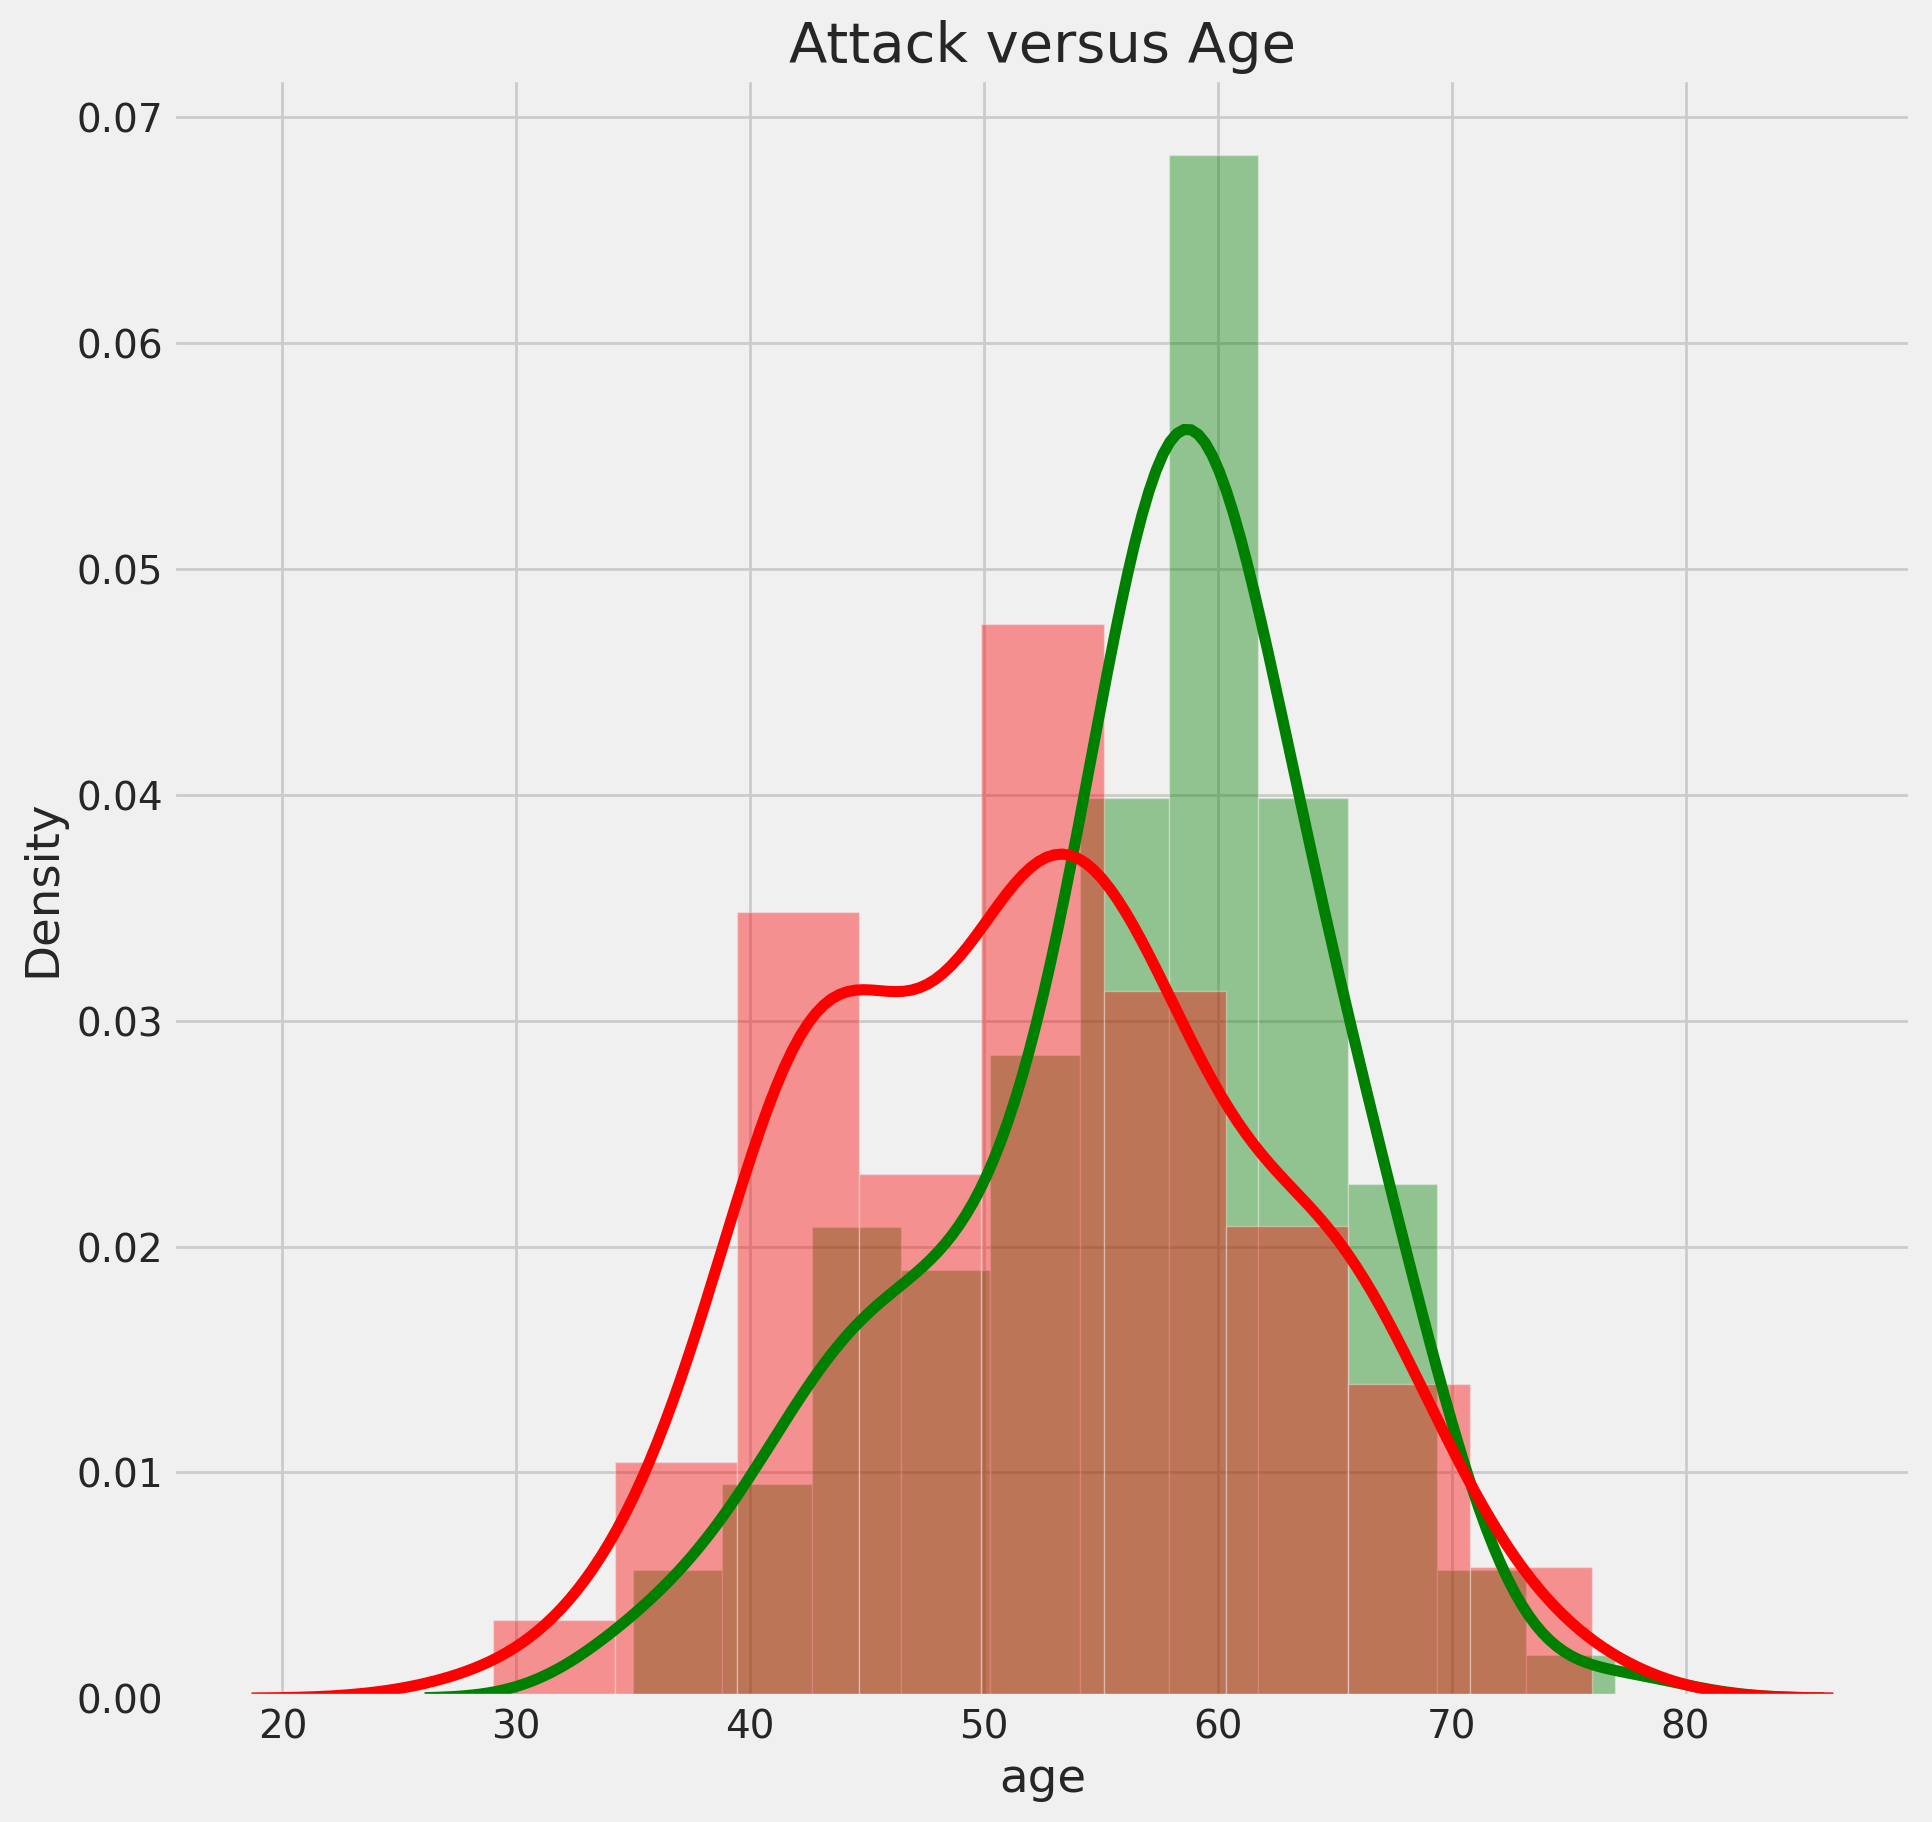

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['target'] == 0][
    "age"], color='green',kde=True,)

sns.distplot(df[df['target'] == 1][
    "age"], color='red',kde=True)


plt.title('Attack versus Age')
plt.show()

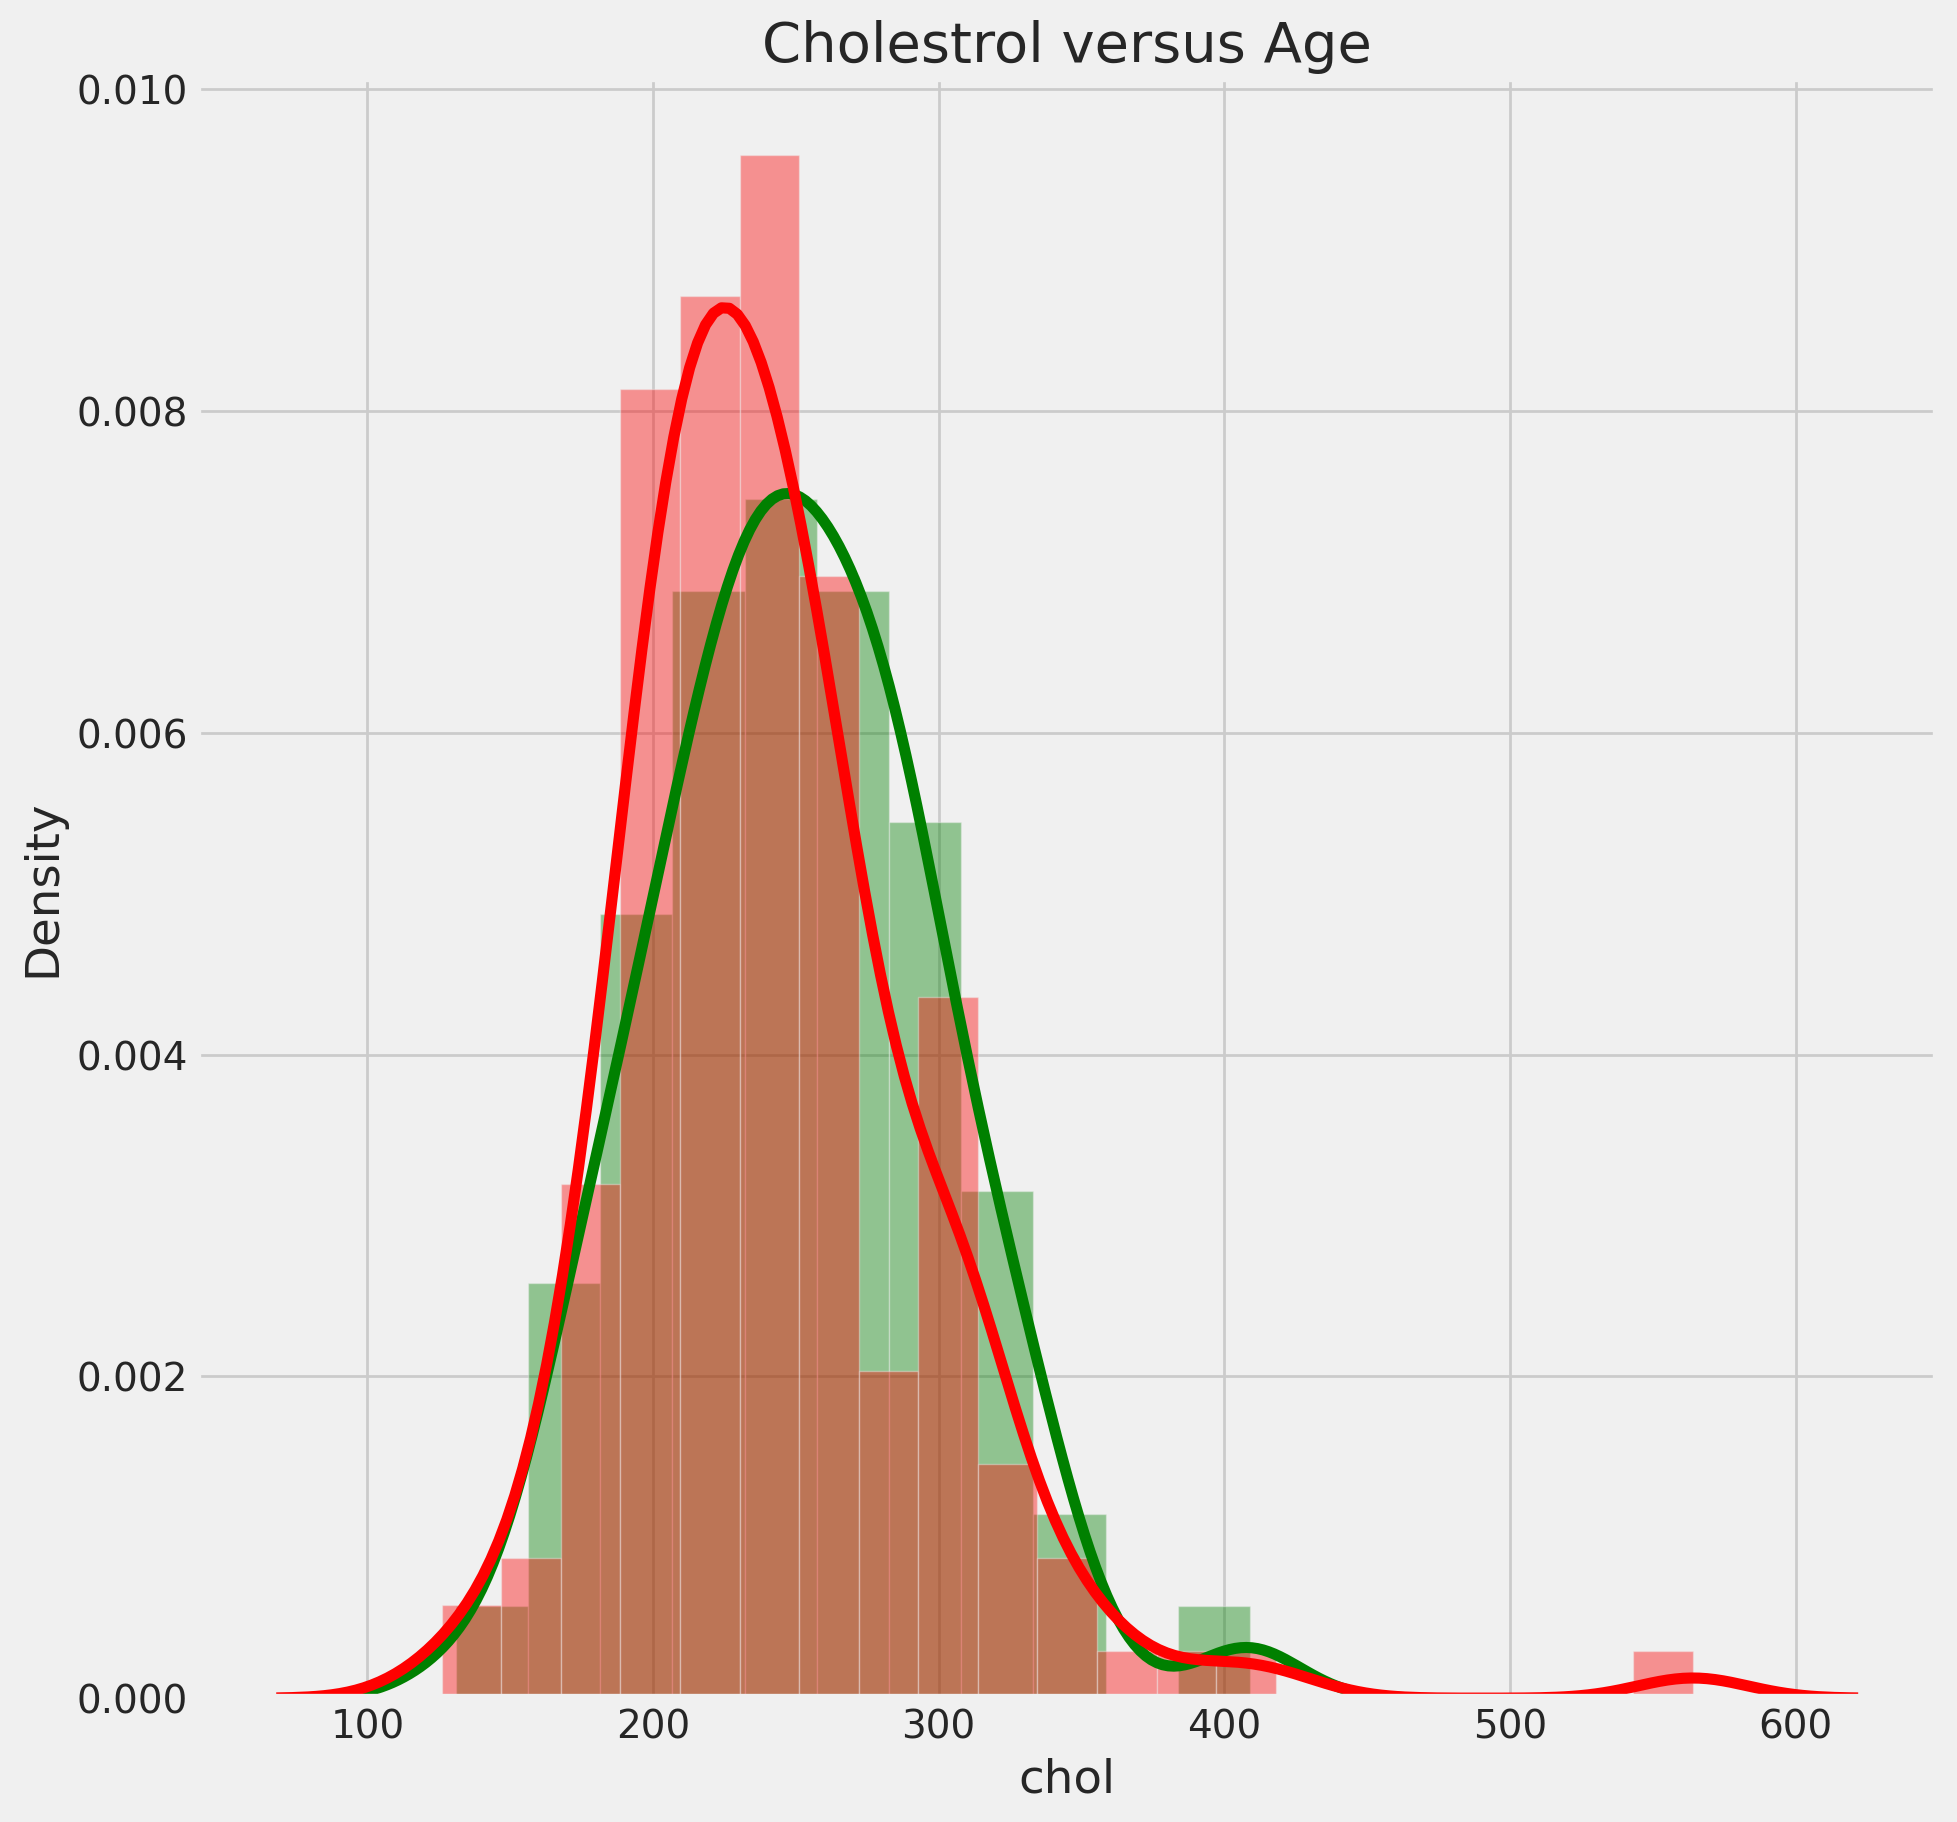

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['target'] == 0][
    "chol"], color='green',kde=True,)

sns.distplot(df[df['target'] == 1][
    "chol"], color='red',kde=True)

plt.title('Cholestrol versus Age')
plt.show()

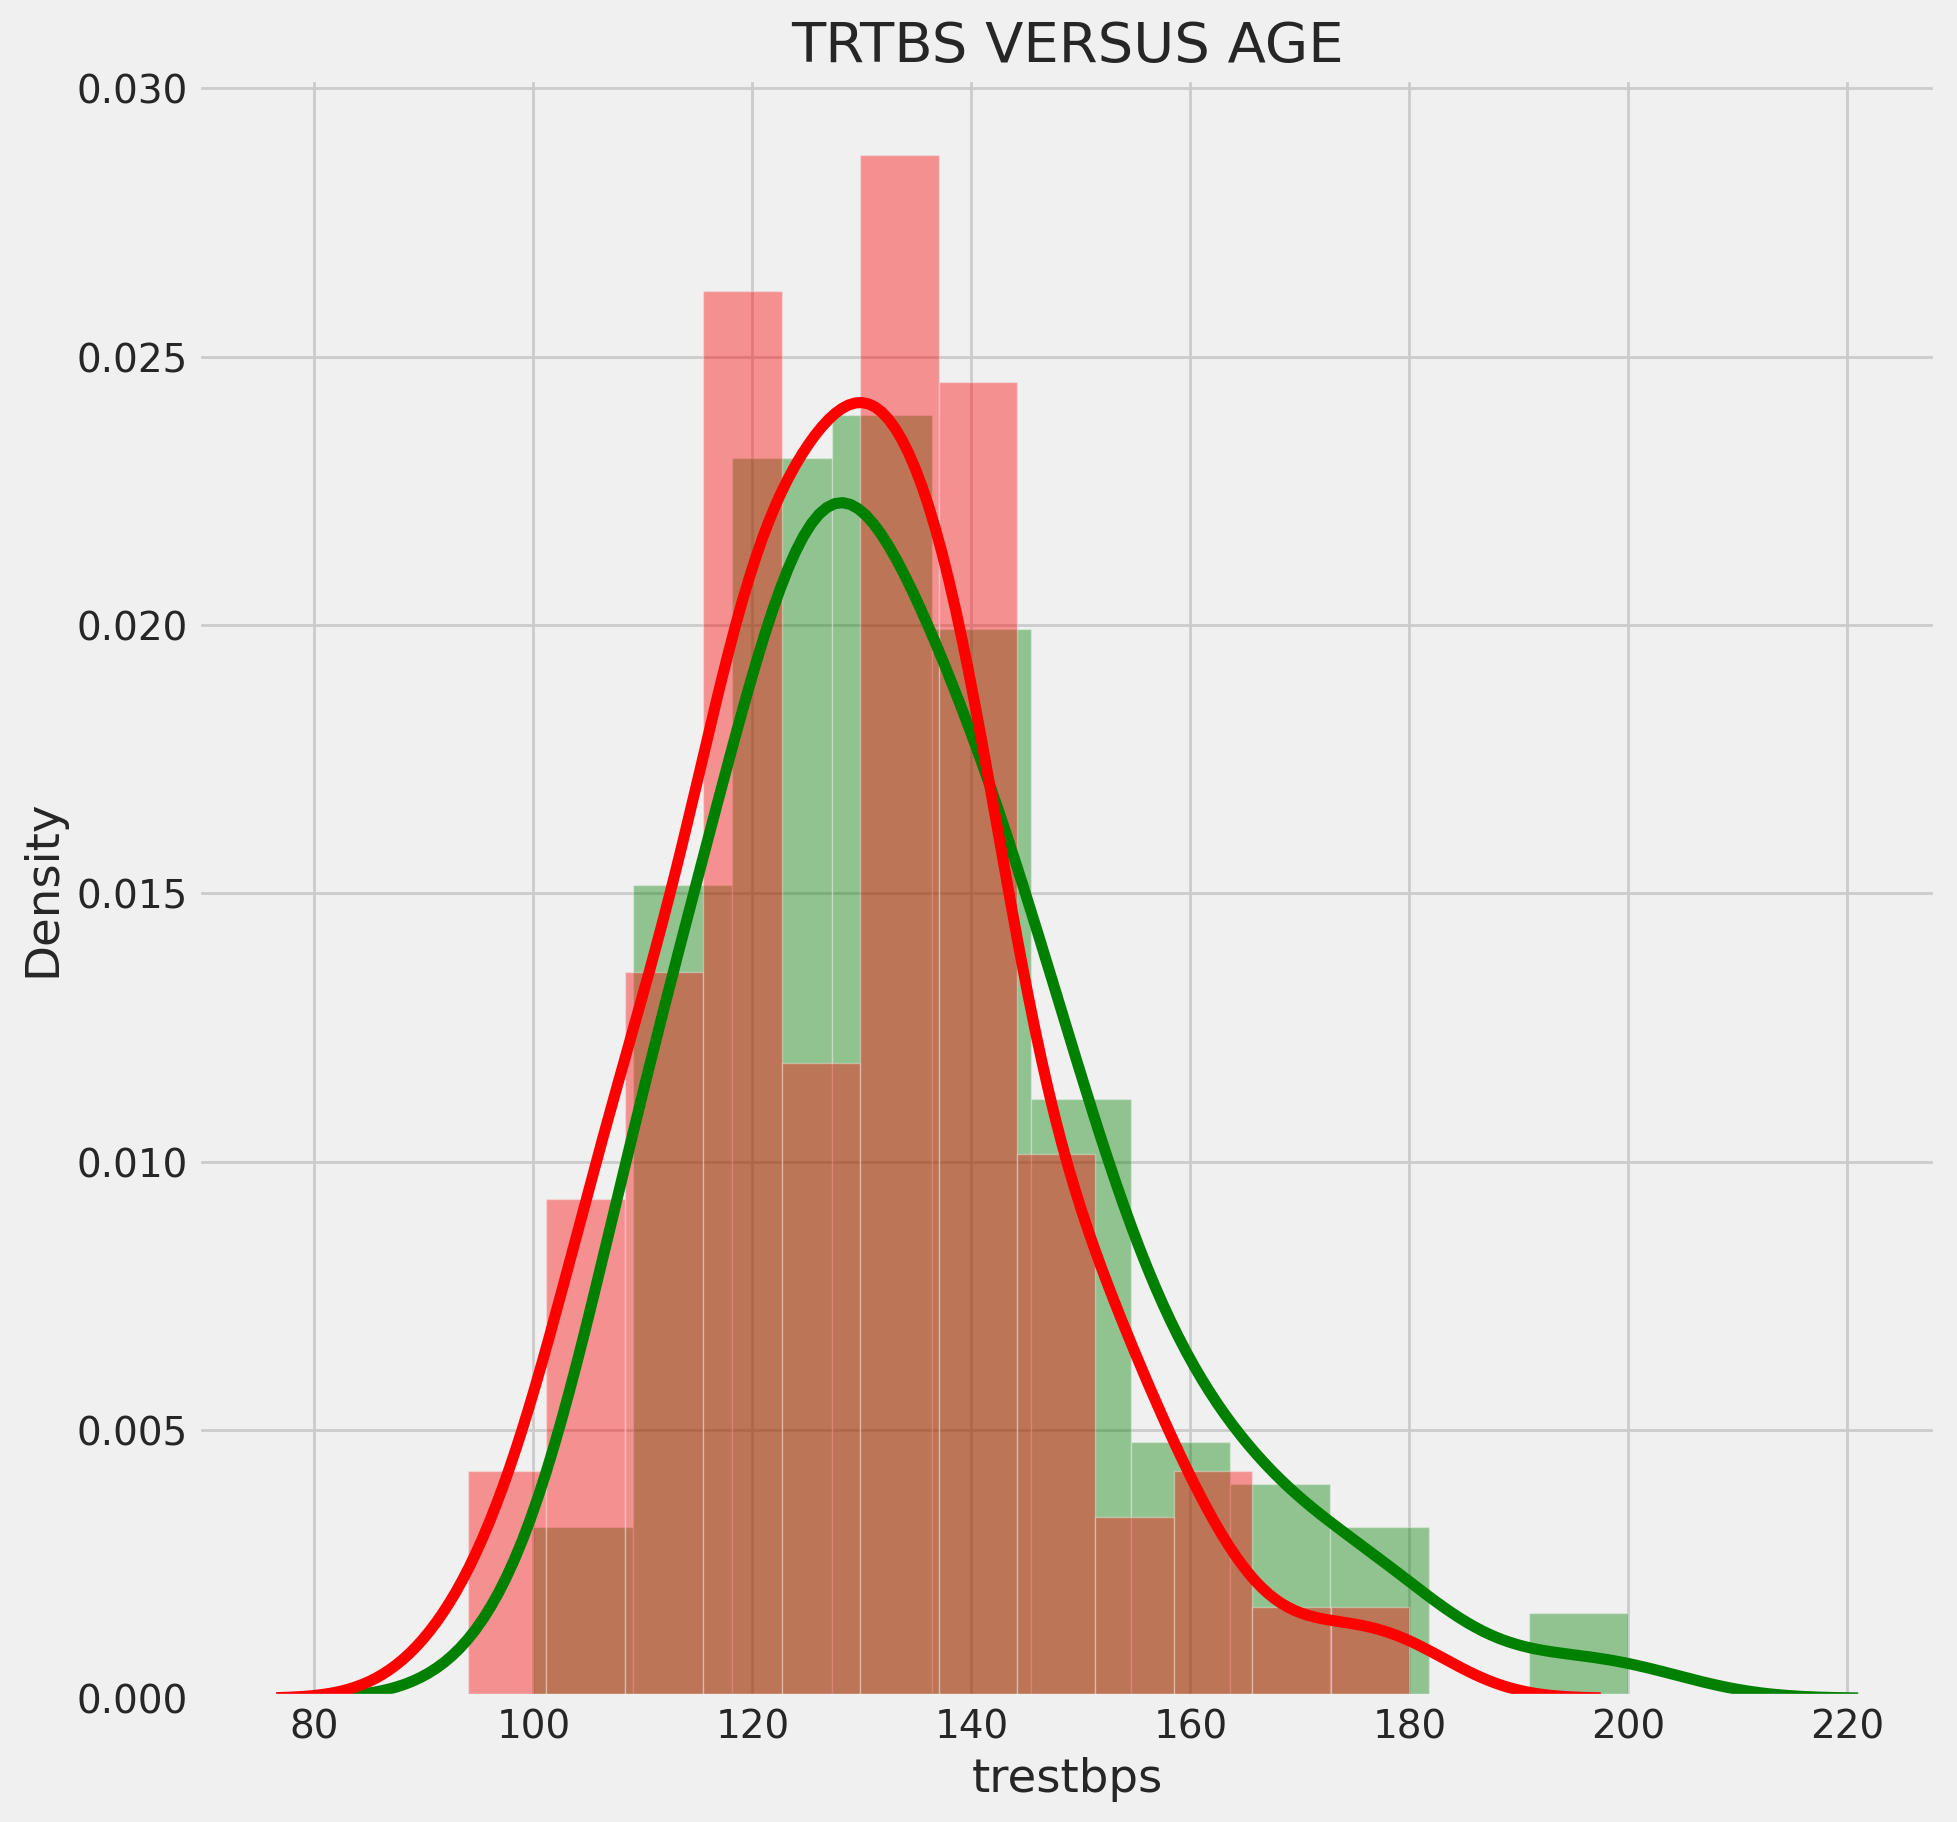

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['target'] == 0][
    "trestbps"], color='green',kde=True,)

sns.distplot(df[df['target'] == 1][
    "trestbps"], color='red',kde=True)

plt.title('Trtbs versus Age'.upper())
plt.show()

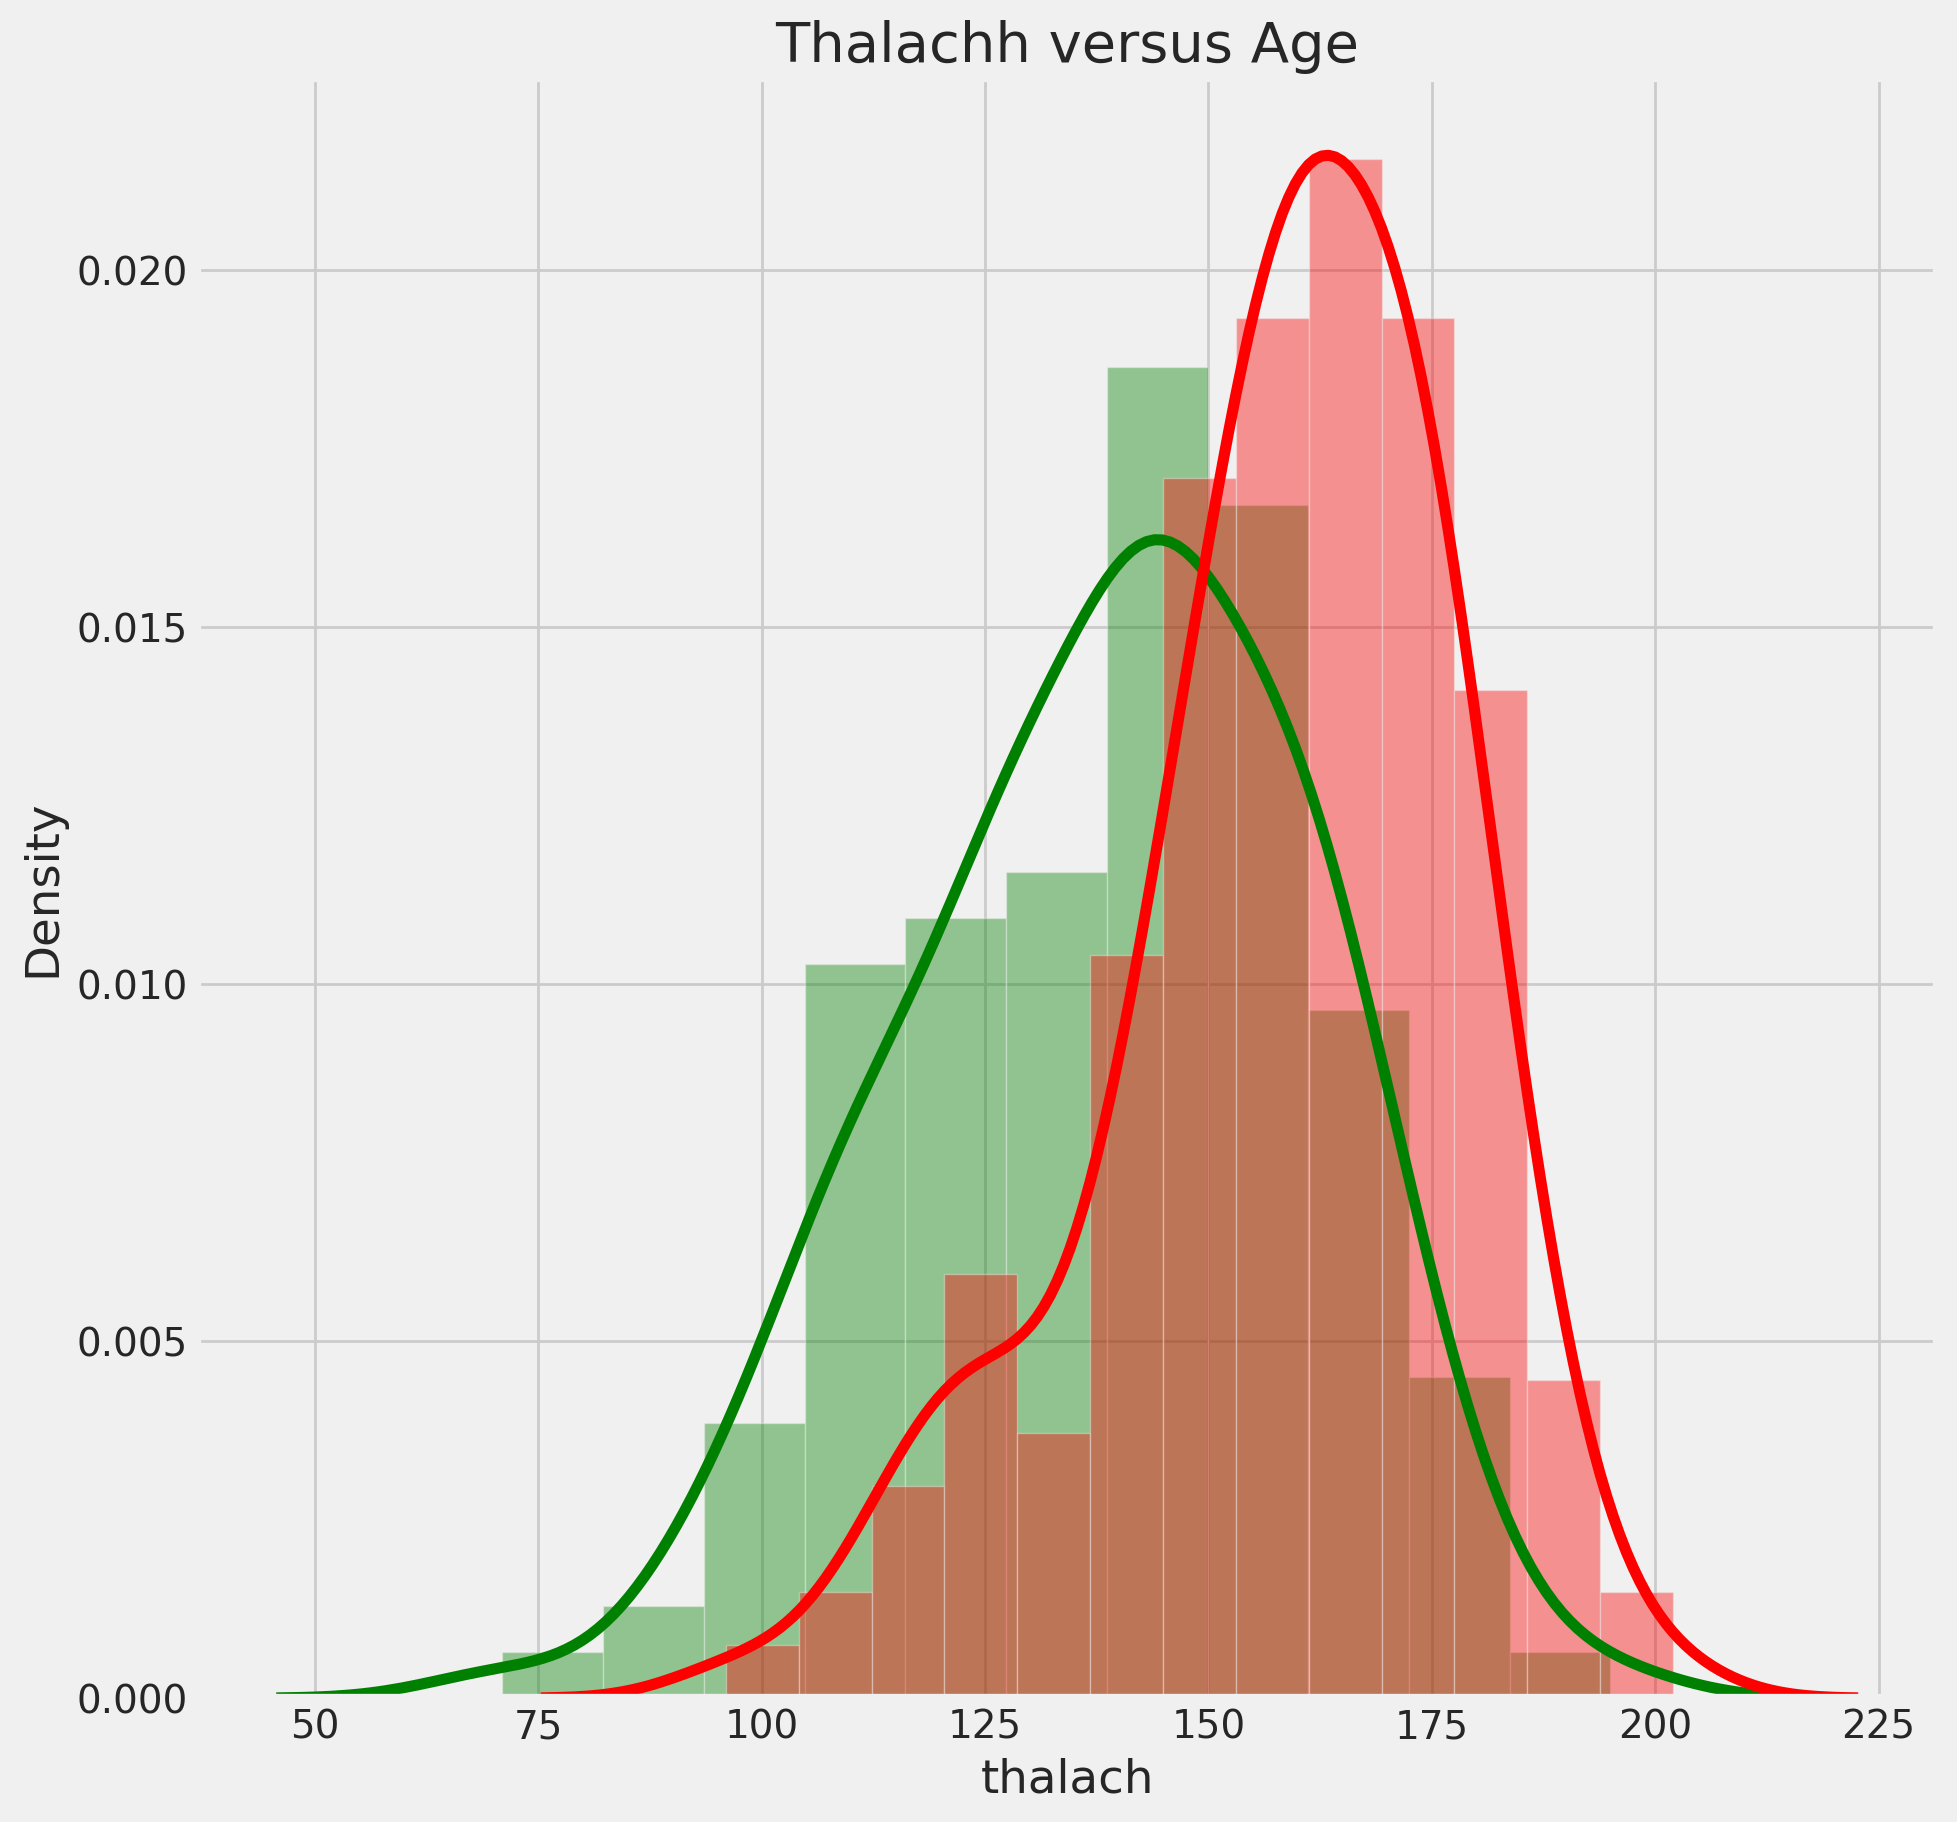

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['target'] == 0][
    "thalach"], color='green',kde=True,)

sns.distplot(df[df['target'] == 1][
    "thalach"], color='red',kde=True)

plt.title('Thalachh versus Age')
plt.show()

# 06: Pair Plot

<Figure size 2000x2000 with 0 Axes>

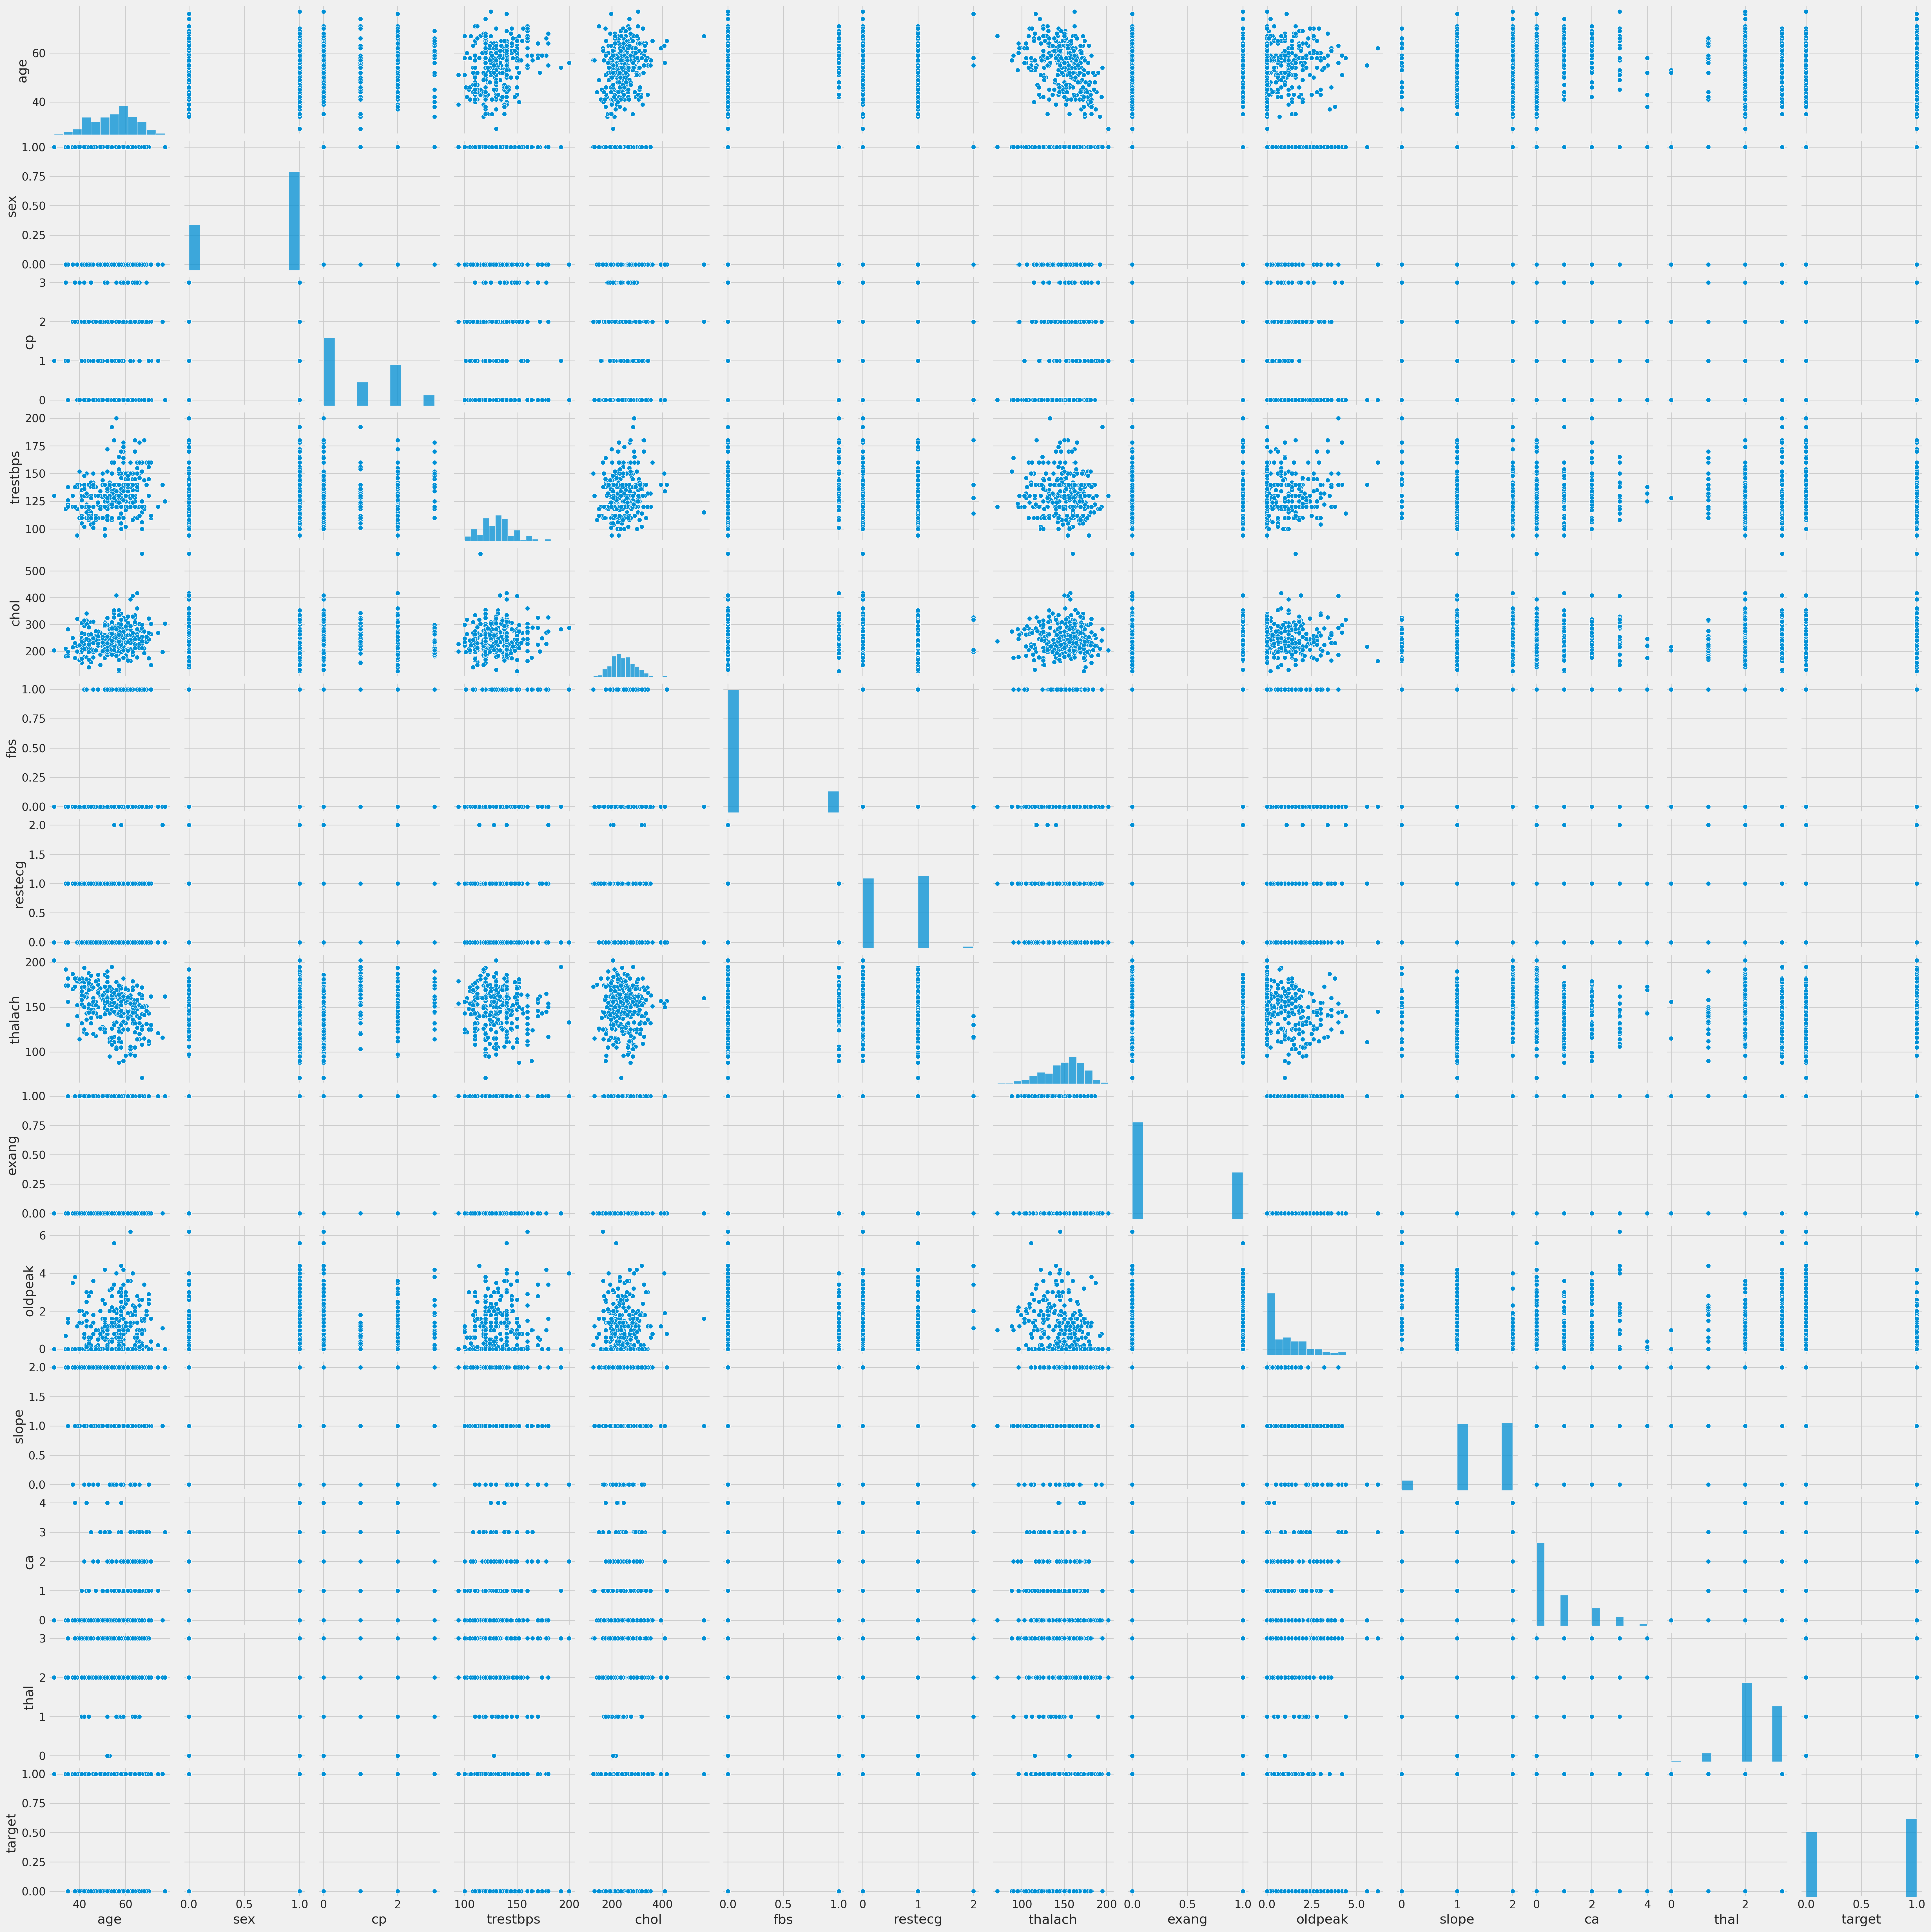

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

# 07: Violin Plot

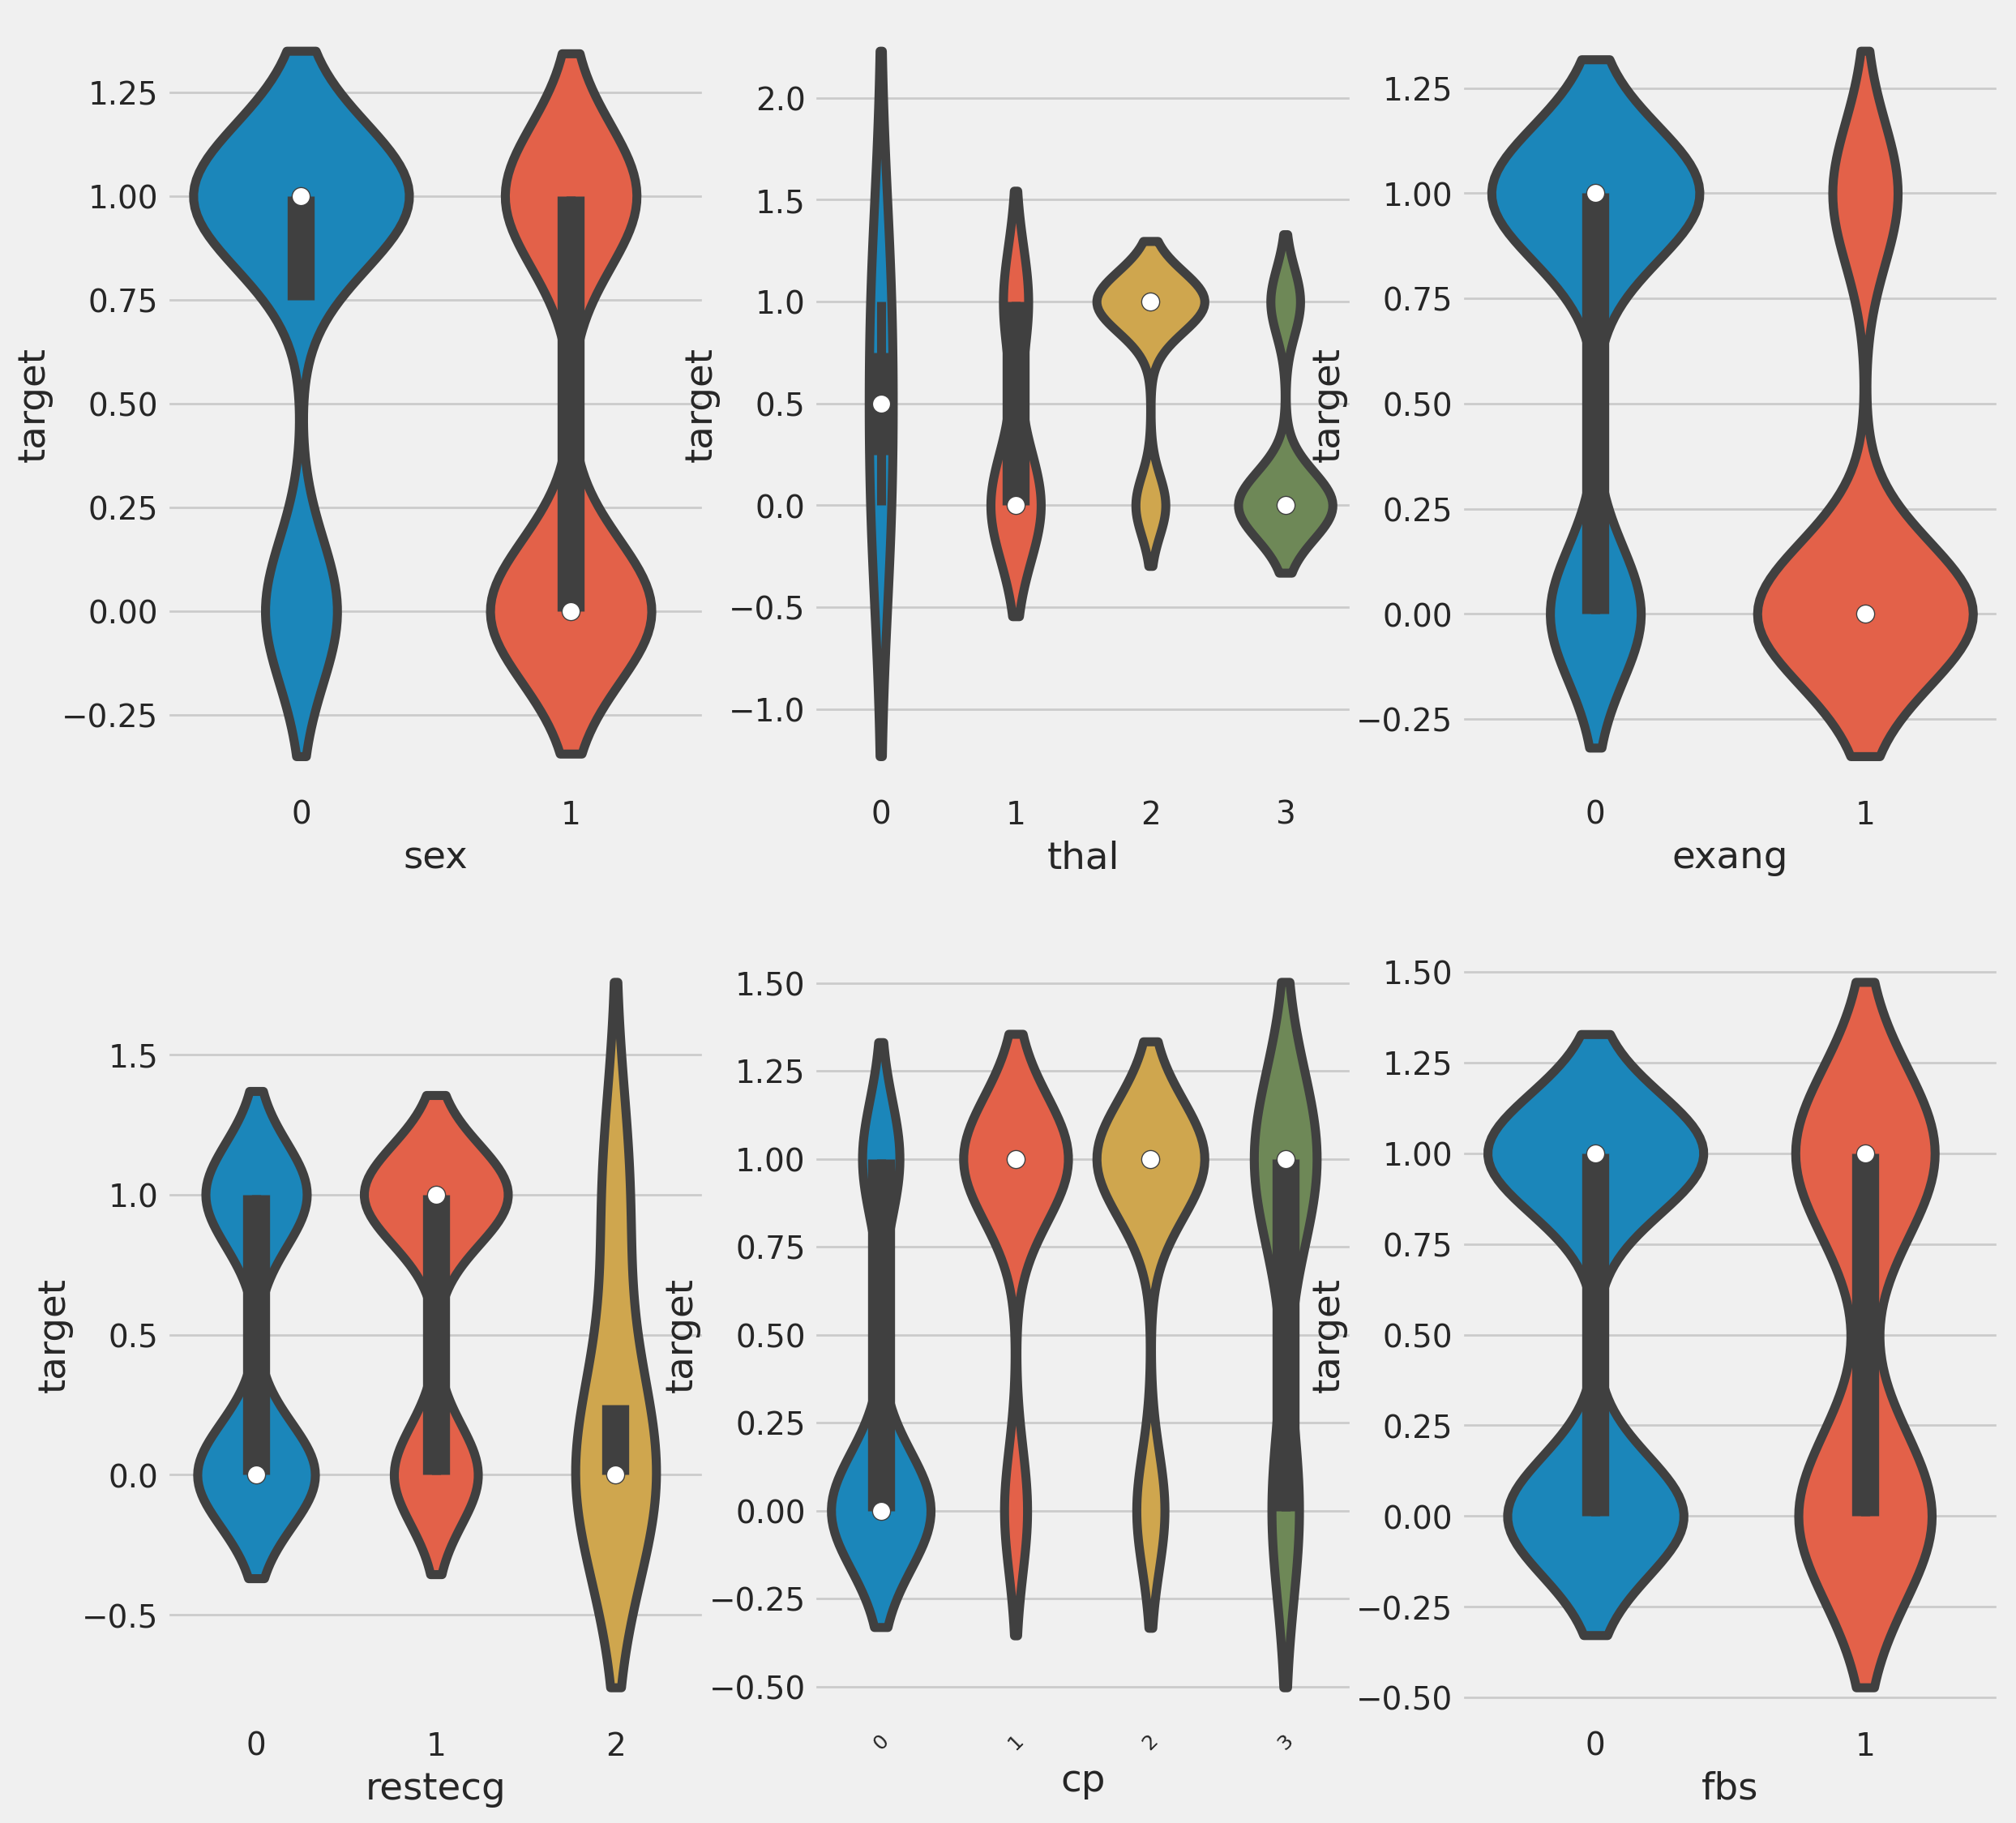

In [ ]:
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex',
               y = 'target',
               data = df)

plt.subplot(2,3,2)
sns.violinplot(x = 'thal',
               y = 'target',
               data = df)

plt.subplot(2,3,3)
sns.violinplot(x = 'exang',
               y = 'target',
               data = df)

plt.subplot(2,3,4)
sns.violinplot(x = 'restecg',
               y = 'target',
               data = df)

plt.subplot(2,3,5)
sns.violinplot(x = 'cp',
               y = 'target',
               data = df)

plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'fbs',
               y = 'target',
               data = df)

plt.show()

<AxesSubplot:>

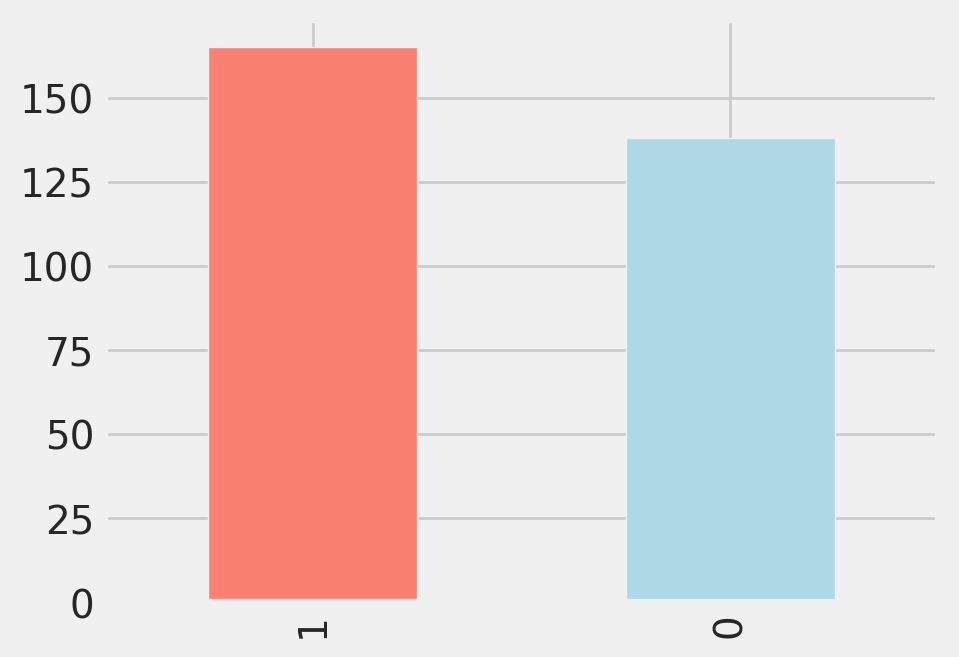

In [ ]:
df.target.value_counts().plot(kind="bar",
   color=["salmon", "lightblue"])
plt.show()

We have 165 people with heart disease and 138 people without heart disease, so our problem is balanced.

# 08: PieChart

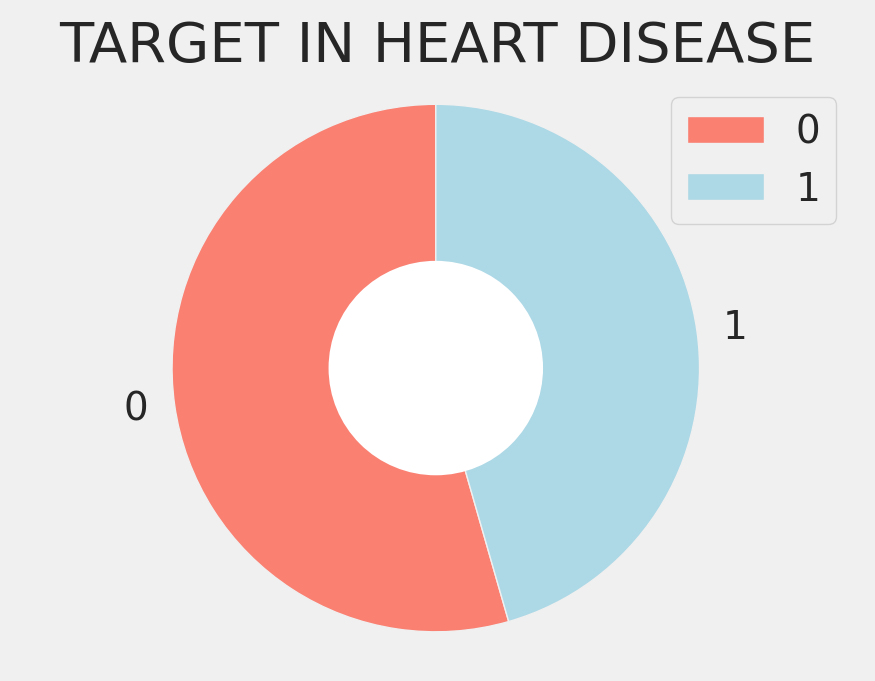

In [ ]:
colors = ["salmon", "lightblue"]
labels = ['0','1']
values = df['target'].value_counts(
    )/ df['target'].shape[0]

fig, ax = plt.subplots()
ax.pie(values,
    labels=labels,
    startangle=90,
    colors=colors)

ax.axis('equal')

centre_circle = plt.Circle((0,0),
        0.4,
        color="white",
        fc="white",
        linewidth=1.25)

fig.gca().add_artist(centre_circle)

plt.legend()
plt.title("Target In Heart Disease".upper())
plt.show()

# 09: HeatMap

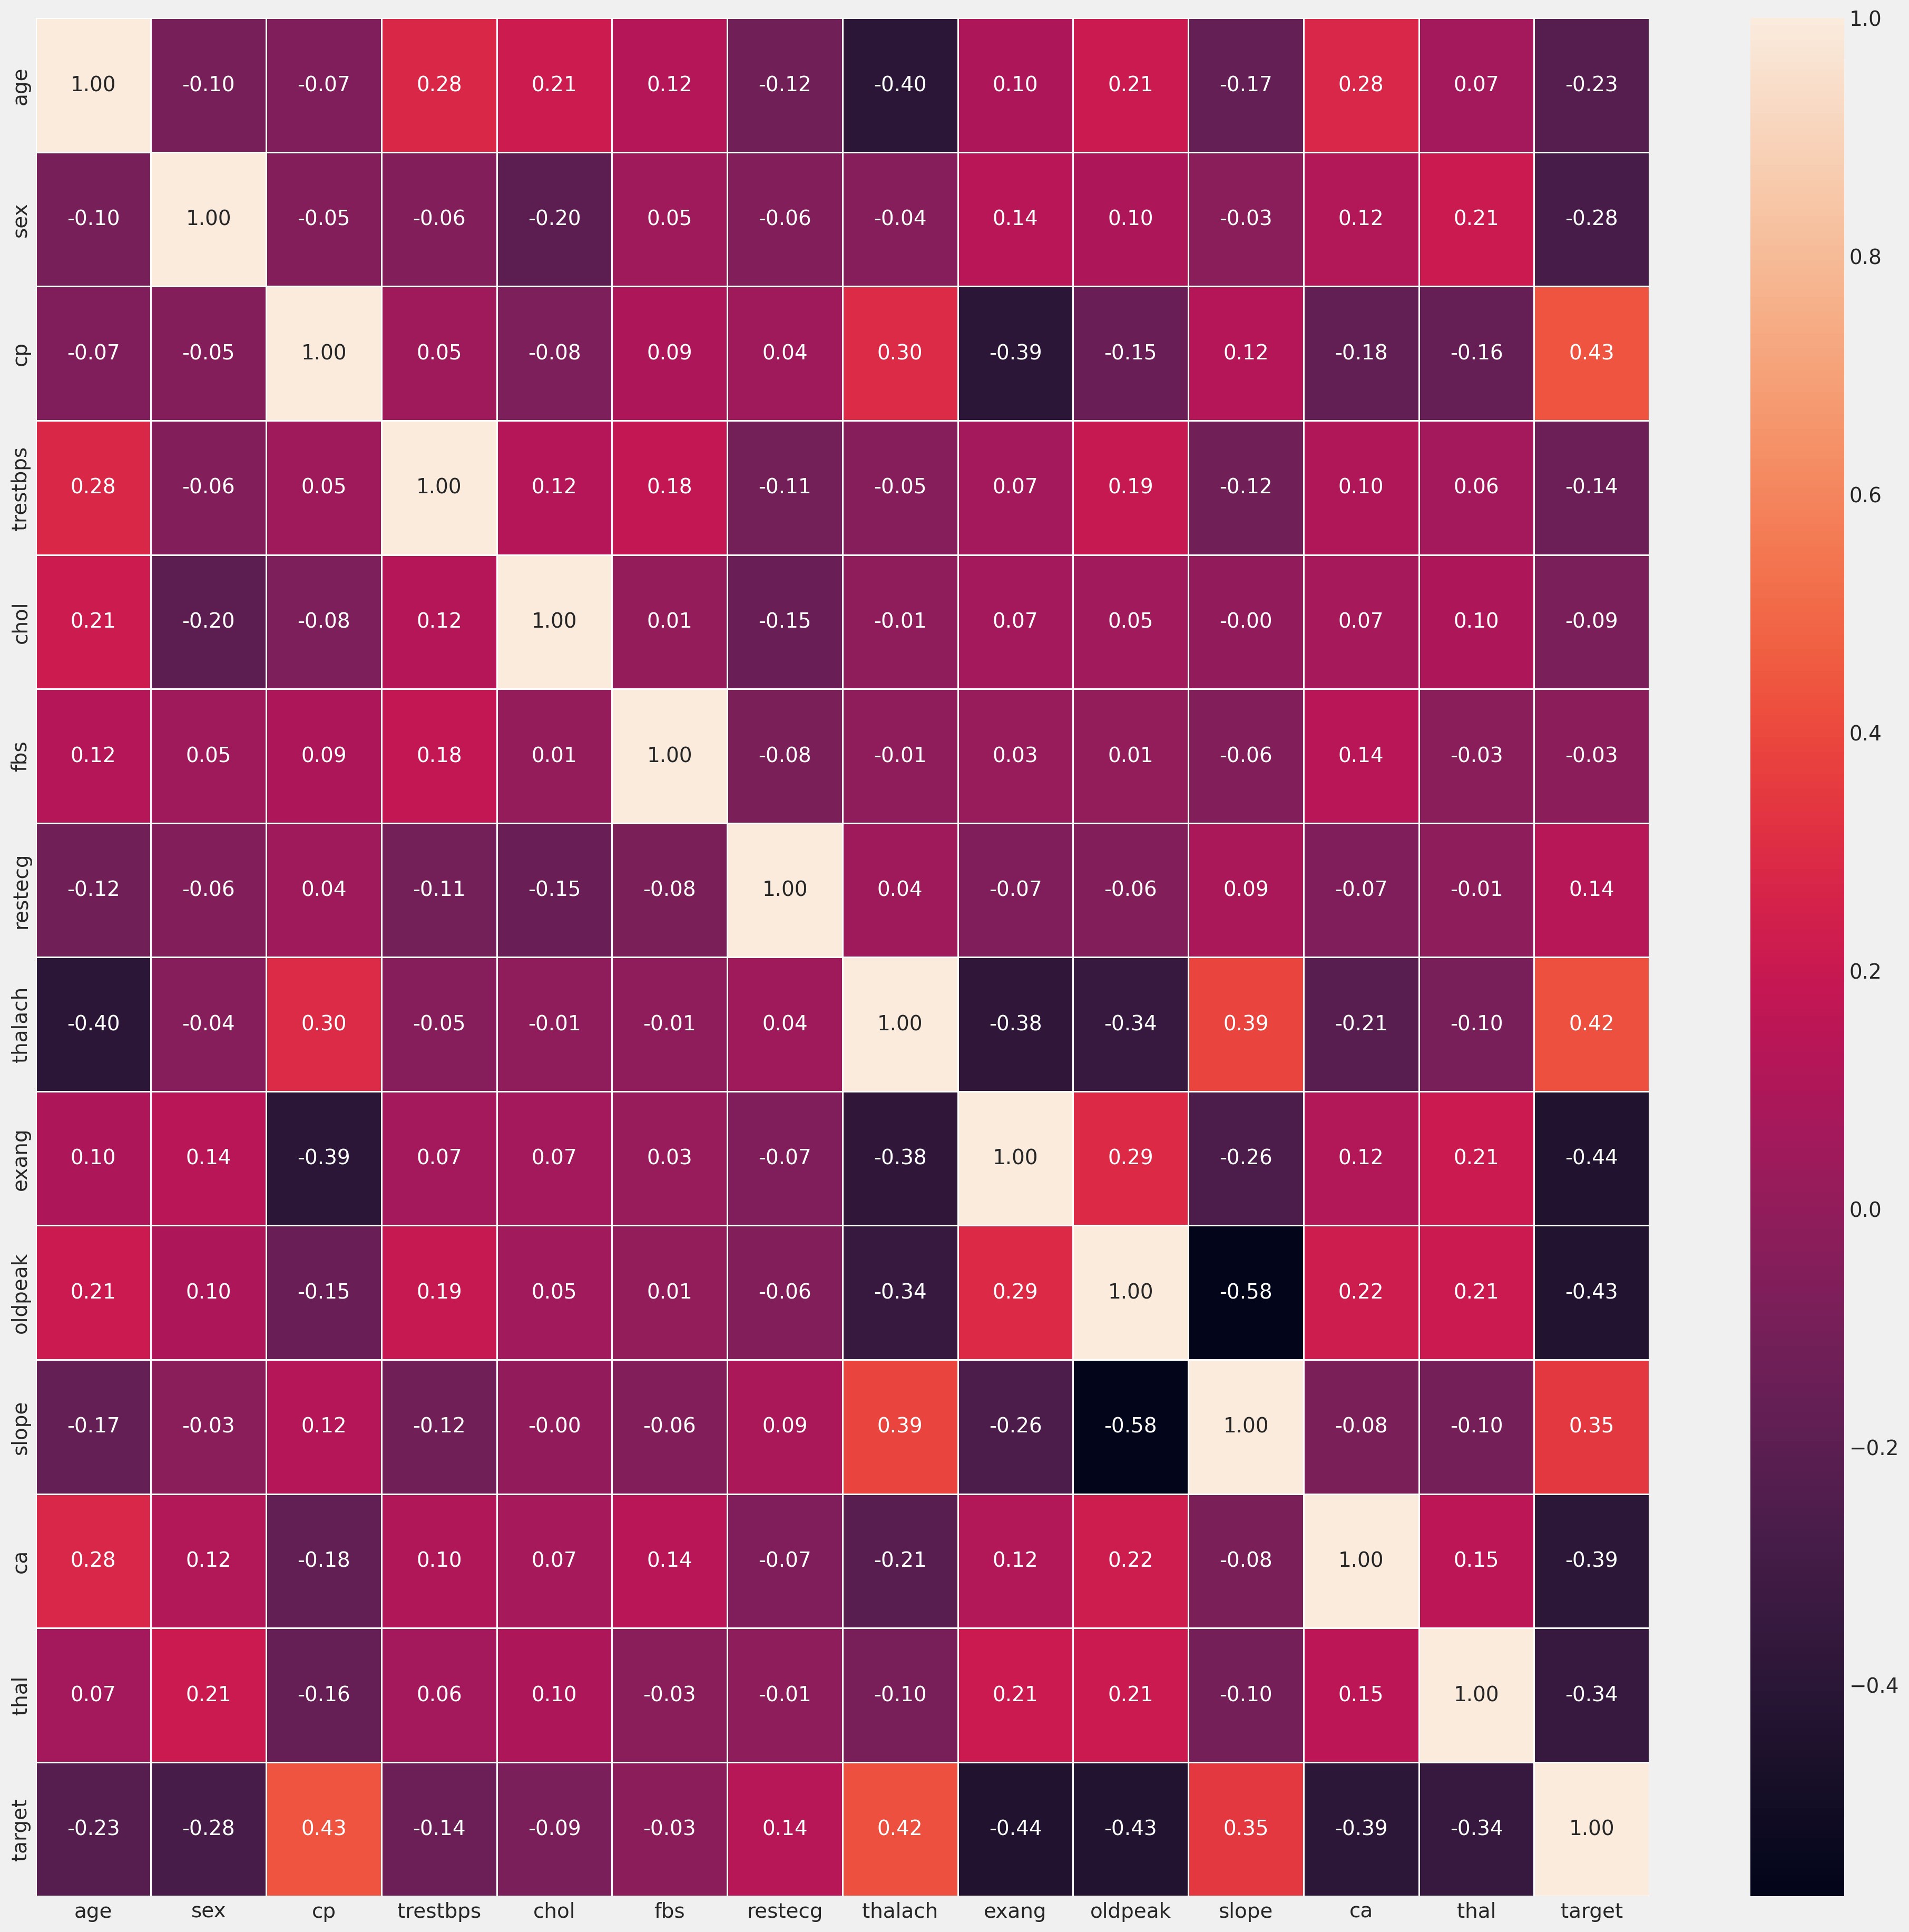

In [ ]:
plt.figure(figsize=(22,22))
sns.heatmap(data=df.corr(),
            annot=True,
            fmt=".2f",
            linewidths=0.5)

plt.show()

# 10: Skewness

In [ ]:
a = df.target.skew()
print(f'Target Skewness: {a: .2f}')
print()
b = df.age.skew()
print(f'Age Skewness: {b: .2f}')
print()
c = df.sex.skew()
print(f'Sex Skewness: {c: .2f}')
print()
d = df.cp.skew()
print(f'Chest pain Skewness: {d: .2f}')
print()
e = df.trestbps.skew()
print(f'Resting blood pressure Skewness: {e: .2f}')
print()
f = df.chol.skew()
print(f'Cholestoral Skewness: {f: .2f}')
print()
g = df.fbs.skew()
print(f'fasting blood sugar Skewness: {g: .2f}')
print()
h = df.restecg.skew()
print(
f'Resting electrocardiographic results Skewness: {h :.2f}')
print()
i = df.thalach.skew()
print(
f'Maximum heart rate achieved Skewness: {i: .2f}')
print()
j = df.exang.skew()
print(f'Exercise induced angina Skewness: {j: .2f}')
print()
k = df.oldpeak.skew()
print(f'Previous peak Skewness: {k: .2f}')
print()
l = df.slope.skew()
print(f'Slope Skewness: {l: .2f}')
print()
m = df.ca.skew()
print(f'Number of major vessels Skewness: {m: .2f}')
print()
n = df.thal.skew()
print(f'Thalium Stress Skewness: {n: .2f}')
print()

Target Skewness: -0.18

Age Skewness: -0.20

Sex Skewness: -0.79

Chest pain Skewness:  0.48

Resting blood pressure Skewness:  0.71

Cholestoral Skewness:  1.14

fasting blood sugar Skewness:  1.99

Resting electrocardiographic results Skewness: 0.16

Maximum heart rate achieved Skewness: -0.54

Exercise induced angina Skewness:  0.74

Previous peak Skewness:  1.27

Slope Skewness: -0.51

Number of major vessels Skewness:  1.31

Thalium Stress Skewness: -0.48



**In Above Result**
* fasting blood sugar Skewness is More so, droping that Column

In [ ]:
df = df.drop(columns=['fbs'], axis=1)
df

age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   3       145   233        0      150      0      2.3      0   
1     37    1   2       130   250        1      187      0      3.5      0   
2     41    0   1       130   204        0      172      0      1.4      2   
3     56    1   1       120   236        1      178      0      0.8      2   
4     57    0   0       120   354        1      163      1      0.6      2   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   57    0   0       140   241        1      123      1      0.2      1   
299   45    1   3       110   264        1      132      0      1.2      1   
300   68    1   0       144   193        1      141      0      3.4      1   
301   57    1   0       130   131        1      115      1      1.2      1   
302   57    0   1       130   236        0      174      0      0.0      1   

     ca  thal  target  
0     0     1       1  
1     0     2       1  
2     0     2       1  
3     0     2       1  
4     0     2       1  
..   ..   ...     ...  
298   0     3       0  
299   0     3       0  
300   2     3       0  
301   1     3       0  
302   1     2       0  

[303 rows x 13 columns]

In [ ]:
x = df.drop('target', axis=1)
x

age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   3       145   233        0      150      0      2.3      0   
1     37    1   2       130   250        1      187      0      3.5      0   
2     41    0   1       130   204        0      172      0      1.4      2   
3     56    1   1       120   236        1      178      0      0.8      2   
4     57    0   0       120   354        1      163      1      0.6      2   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   57    0   0       140   241        1      123      1      0.2      1   
299   45    1   3       110   264        1      132      0      1.2      1   
300   68    1   0       144   193        1      141      0      3.4      1   
301   57    1   0       130   131        1      115      1      1.2      1   
302   57    0   1       130   236        0      174      0      0.0      1   

     ca  thal  
0     0     1  
1     0     2  
2     0     2  
3     0     2  
4     0     2  
..   ..   ...  
298   0     3  
299   0     3  
300   2     3  
301   1     3  
302   1     2  

[303 rows x 12 columns]

In [ ]:
y = df.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# 11: Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit_transform(x)

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

# 12: Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(
    x, y, test_size=0.3, random_state=11)

In [ ]:
from sklearn.linear_model import LogisticRegression

Log = LogisticRegression()

In [ ]:

Log.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = Log.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1])

# 13: Evaluation Matrics

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(f'The Confusion Matrix : ')
print(cm)

The Confusion Matrix : 
[[29  9]
 [ 9 44]]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'The Accuracy is :{accuracy*100: .2f}%')

The Accuracy is : 80.22%


In [ ]:
((29 + 44) / (29 + 9 + 9 + 44)) * 100

80.21978021978022

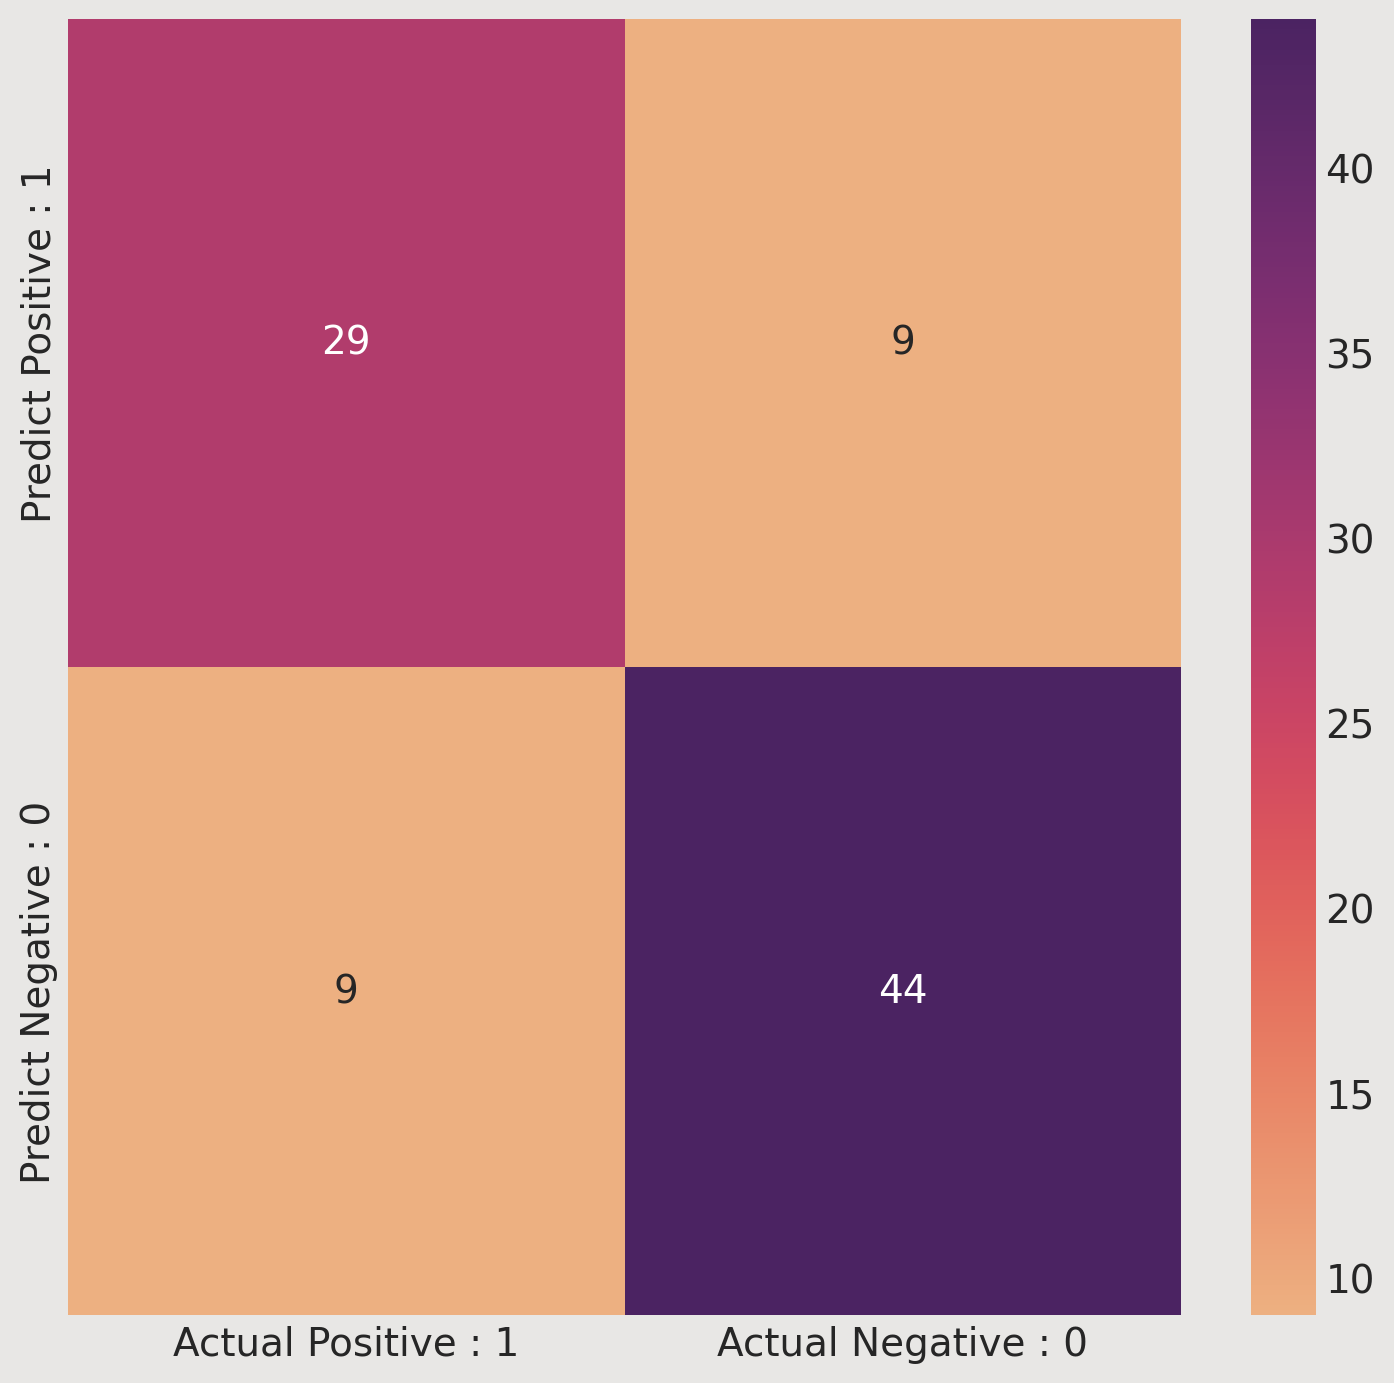

In [ ]:
cm_mat = pd.DataFrame(
    data=cm,
    columns=[
        'Actual Positive : 1',
        'Actual Negative : 0'
            ],
    index=[
        'Predict Positive : 1',
        'Predict Negative : 0'
    ])

plt.figure(figsize=(8, 8),
           facecolor='#E8E7E5')

c = sns.color_palette('flare',
                      as_cmap=True)

sns.heatmap(cm_mat,
            annot=True,
            fmt='d',
            cmap=c)

plt.show()

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f'Recall is : {recall*100 :.2f}%')

Recall is : 83.02%


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f'The Precision : {precision*100: .2f}%')

The Precision :  83.02%


In [ ]:
from sklearn.metrics import f1_score

F1 = f1_score(y_test, y_pred)
print(f'F1 Score : {F1*100 : .2f}%')

F1 Score :  83.02%


# 14: Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(f'Classification Report: {report}')

Classification Report:               precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [ ]:
test_score = accuracy_score(
    y_test,
    Log.predict(x_test)) * 100

train_score = accuracy_score(
    y_train,
    Log.predict(x_train)) * 100

results_df = pd.DataFrame(
    data=[["Logistic Regression",
           train_score,
           test_score]],
    columns=[
        'Model',
        'Training Accuracy %',
        'Testing Accuracy %']
)

results_df

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            87.735849            80.21978